# Vehicle Insurance Claim Fraud Detection
Fraud detection use-case for vehicle insurance industry
## Vehicle Insurance Fraud Detection
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.
## About this dataset
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is to detect if a claim application is fraudulent or not - FraudFound_P

<br>This dataset can be found on kaggle - [Vehicle Insurance Claim Fraud Detection](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection/code?select=fraud_oracle.csv "Fraud detection use-case for vehicle insurance industry")

### Steps
1. Import Libraries
2. Import Data
3. Descriptive Statistics
    * ID
    * Demographics
    * Numerical
    * Categorical
    * Date
4. Cleaning
    * Columns Names
    * Data Type Changes
    * Missing Value Treatment
5. EDA
    * Univariate - Plots - Histogram, Box, Bar Plot
    * Bivariate - Plots
6. Preprocessing
    * Outlier Treatment
    * Numerical Scaling
    * Categorical Encoding
7. Build Model
    * Import Package
    * Create an Instance
    * Build/Fit Model
    * Make Predictions
8. Check Performance
    * Calculate Performance Metrics
9. Interpretation
    * What is means for the Business Objective

### Step 1: <span style="color:green">Import Libraries</span> 

Import the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
Include the line **'%matplotlib inline'** so that the graphs are easily included in the notebook. 

**Seaborn** - This library helps create aesthetically pleasing plots.

**Pandas** - This library to view and manipulate your data in a tabular format.

**statsmodels.api** - This library enable the creatation of statistical models. Will use this library when performing regession analysis in this case study.

In [177]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

sns.set_style("darkgrid")
#mpl.rcParams['figure.figsize'] = (20,5)


In [178]:
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

### Step 2: <span style="color:green">Import Data</span> 
The data was obtained from Kaggle.com – [Vehicle Insurance Claim Fraud Detection | Kaggle]( https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection?select=fraud_oracle.csv)
- The file name is fraud_oracle.csv.
- **License** CC0: Public Domain

<br> import the data sources and store as DataFrame.


In [2]:
# import file as df
df_claim = pd.read_csv('fraud_oracle.csv')

### Step 3: <span style="color:green">Descriptive Statistics</span> 


 Print descriptive statistics for each of the DataFrames using 
 - **.describe()** for the columns with Dtype of int64 
 - **.info()**  
 - **.head()**
 - df.isnull().values.any()   &emsp;_Check for NaN entire df_
 - df.isnull().sum().sum()    &emsp;_if true then count the NaN for entire df_
 - df.isnull().sum()          &emsp;_Check each column_

In [3]:
df_claim.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
df_claim.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [7]:
# check for NaN
df_claim.isnull().values.any()

False

In [47]:
for column in df_claim:
    if column == 'PolicyNumber':
        pass
    else:
        print(column)
        print(sorted(df_claim[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

In [161]:
issue = df_claim[(df_claim['DayOfWeekClaimed']== '0') | (df_claim['MonthClaimed']== '0') | (df_claim['Age']== '0')]
print(issue.count())
print(issue)


Month                   1
WeekOfMonth             1
DayOfWeek               1
Make                    1
AccidentArea            1
DayOfWeekClaimed        1
MonthClaimed            1
WeekOfMonthClaimed      1
Sex                     1
MaritalStatus           1
Age                     1
Fault                   1
PolicyType              1
VehicleCategory         1
VehiclePrice            1
FraudFound_P            1
PolicyNumber            1
RepNumber               1
Deductible              1
DriverRating            1
Days_Policy_Accident    1
Days_Policy_Claim       1
PastNumberOfClaims      1
AgeOfVehicle            1
AgeOfPolicyHolder       1
PoliceReportFiled       1
WitnessPresent          1
AgentType               1
NumberOfSuppliments     1
AddressChange_Claim     1
NumberOfCars            1
Year                    1
BasePolicy              1
dtype: int64
     Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural  

<div class='alert alert-block alert-info'>
<br>
<b> One and only one column has zeros for values in 'DayOfWeekClaimed', 'MonthClaimed', or 'Age' <b>

</div>

<div class='alert alert=block alert-warning >
### issue with columns having zero is only one row
</div>

### Step 4: <span style="color:green">Clean Data</span> 


Clean the data 
 - **FraudFound_P** _Change to Boolean?_ Dtype = int64.
 - **PoliceReportFiled**
 - **WitnessPresent**
 - ****

In [8]:
df_claim['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

<div class='alert alert-block alert-info'>
    Fraud was found in approximately 6% of the claims.
</div>

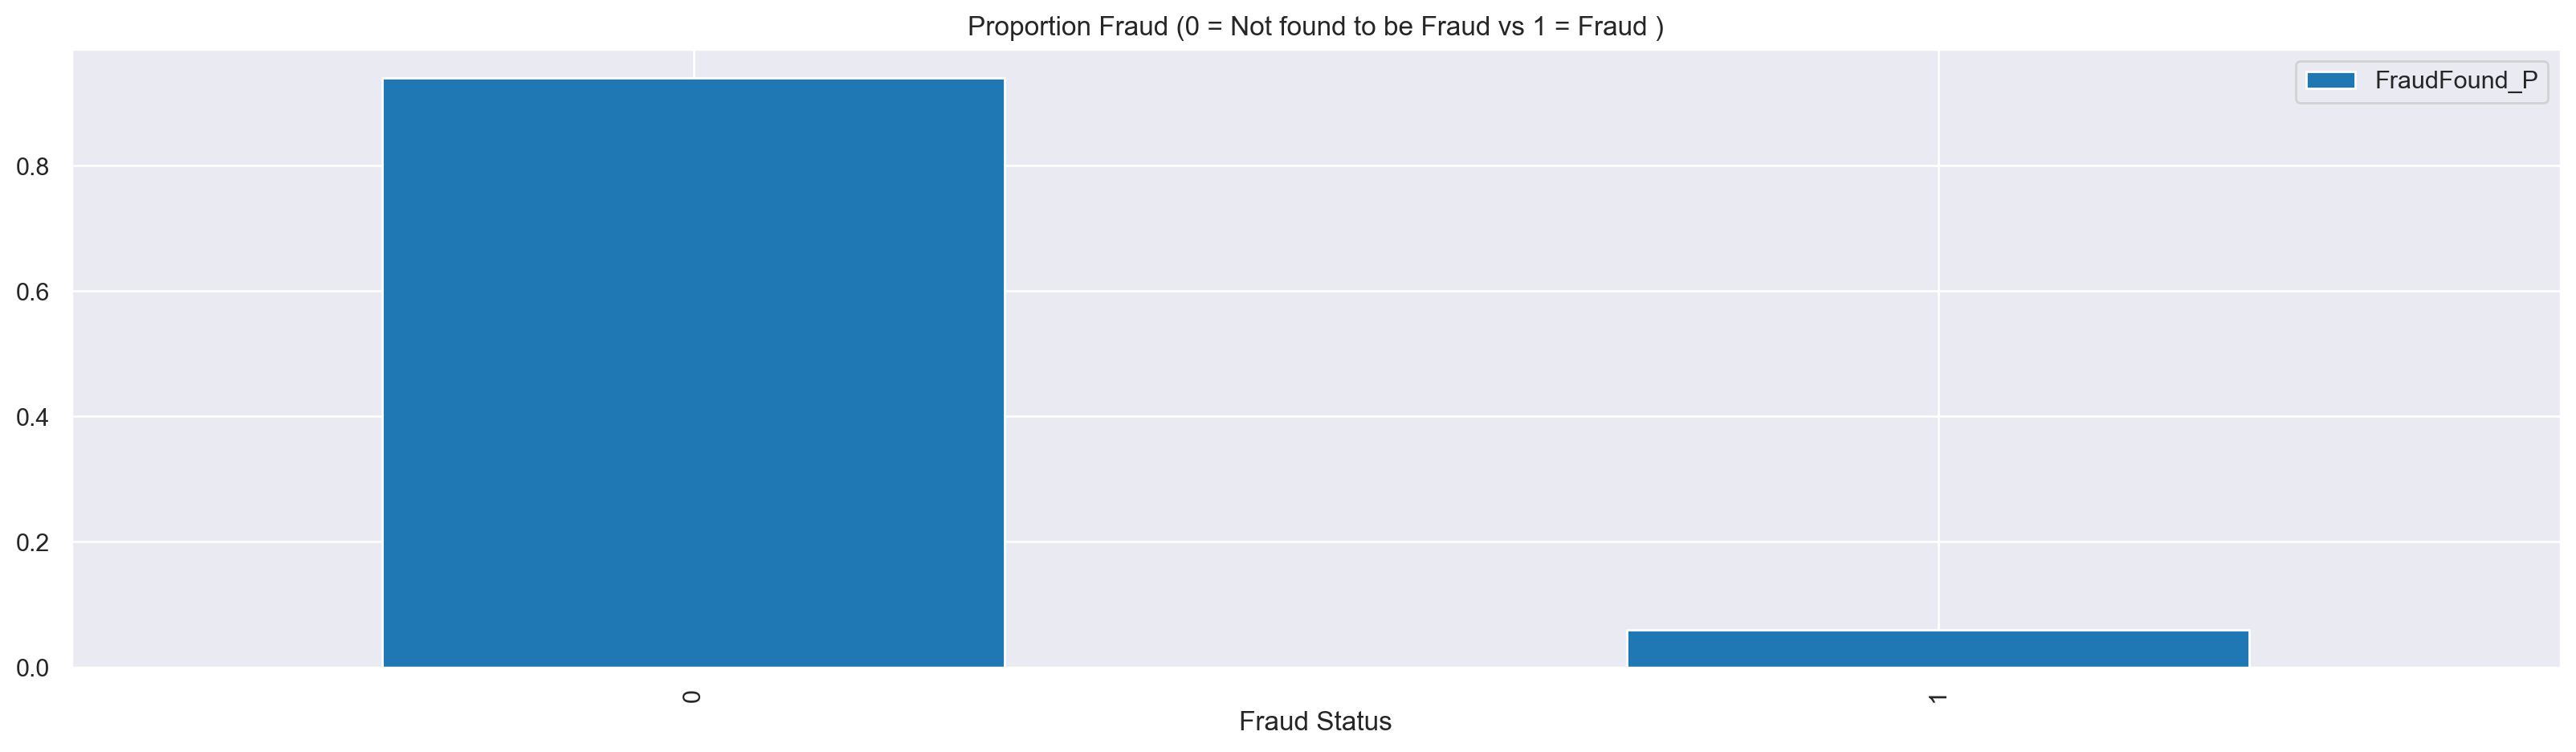

In [179]:
df_claim['FraudFound_P'].value_counts(normalize=True).plot(kind='bar')
plt.title('Proportion Fraud (0 = Not found to be Fraud vs 1 = Fraud )')

plt.xlabel('Fraud Status', fontsize=12)
plt.legend()
plt.show()

In [91]:
fraudstatus = df_claim['FraudFound_P'].value_counts(normalize=True)  #.plot(kind='bar')
type(fraudstatus) 

fraudstatus = pd.DataFrame({'status':fraudstatus.index, 'percent':fraudstatus.values*100})

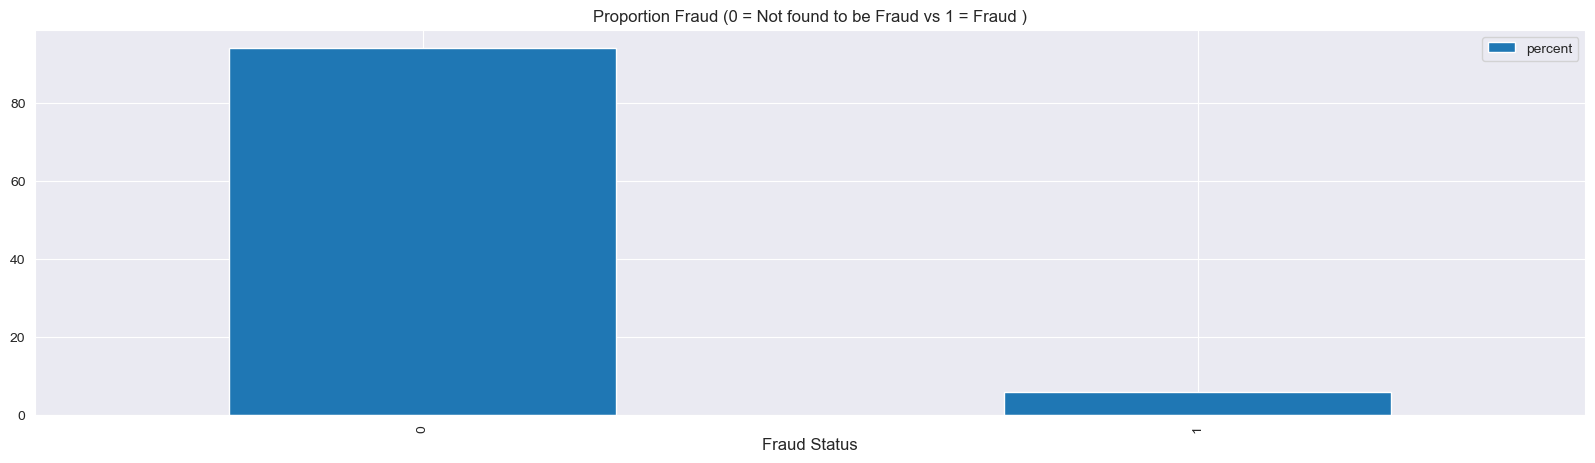

In [95]:
           
fraudstatus['percent'].plot( x='status', y='percent', kind='bar')        
plt.title('Proportion Fraud (0 = Not found to be Fraud vs 1 = Fraud )')

plt.xlabel('Fraud Status', fontsize=12)
plt.legend()
plt.show()

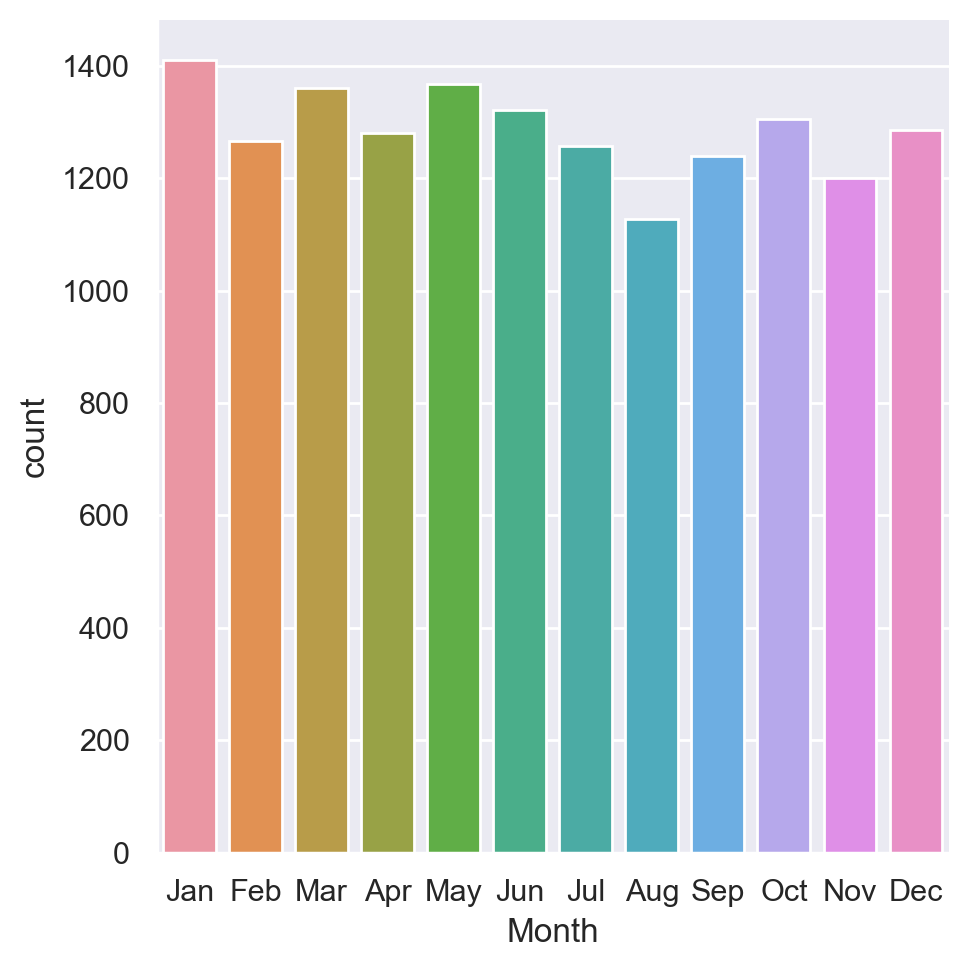

In [180]:
# Count Plots using seaborn
# Put months in correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.catplot(x='Month', 
            data=df_claim, 
            kind='count',
           order=month_order)
plt.show()

# DayOfWeek
#print(df_claim['FraudFound_P'])

for i in list(df_claim) :
    # print(df_fraud[i])
    if (is_numeric_dtype(df_fraud[i])) :
        df_legit[i].plot(kind='hist', color = 'teal')  # Looping through every item in the df
        df_fraud[i].plot(kind='hist', color = 'orange')
        #ax2 = ax1.twinx()  # The Twinx function is used to ensure we share the x-axis for both plots
        # ax2.plot(df_fraud[i], kind='density' ,color = 'r')
        plt.legend()
        plt.title(i)
        plt.show()

Month


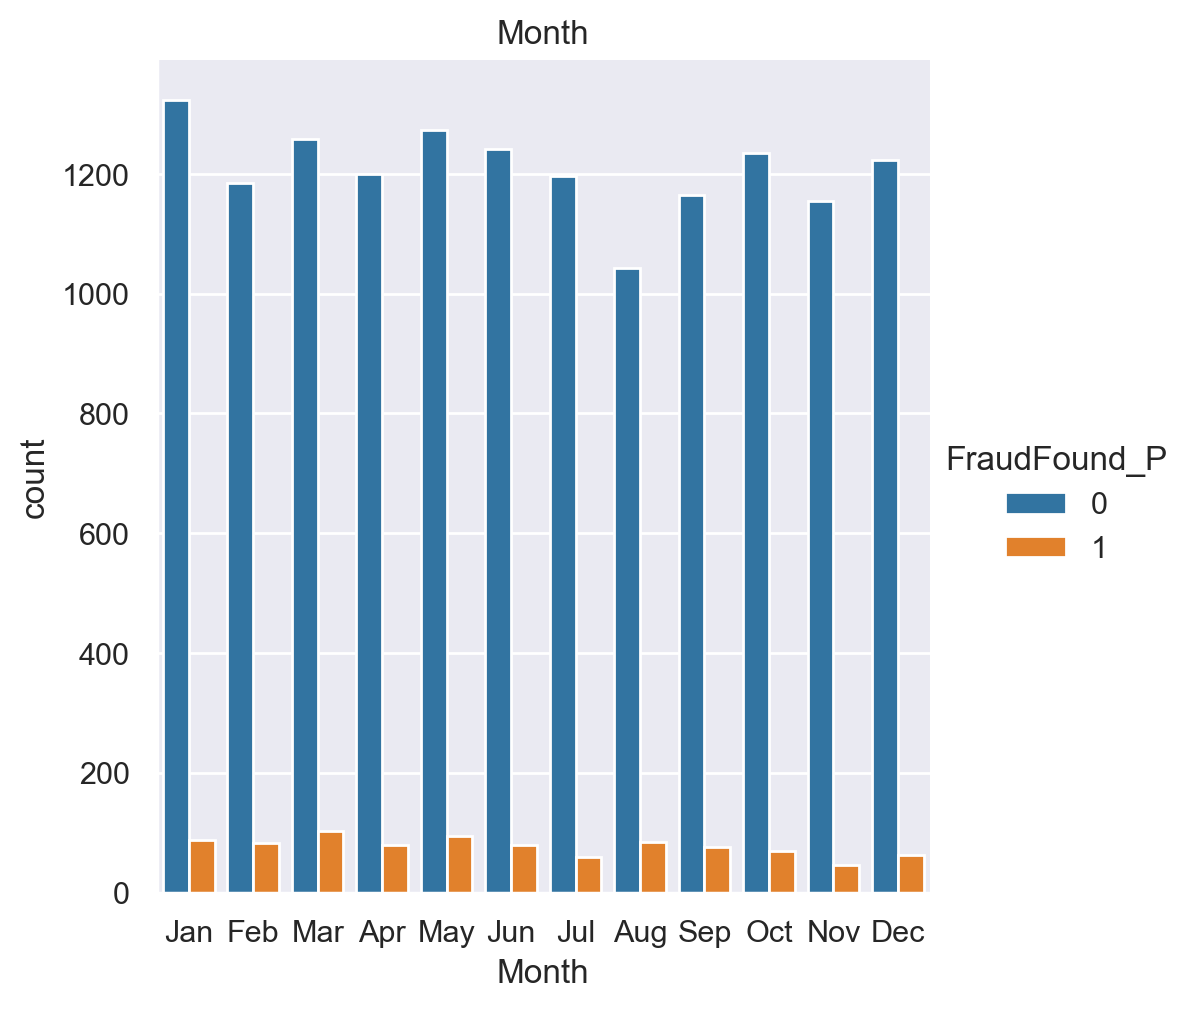

DayOfWeek


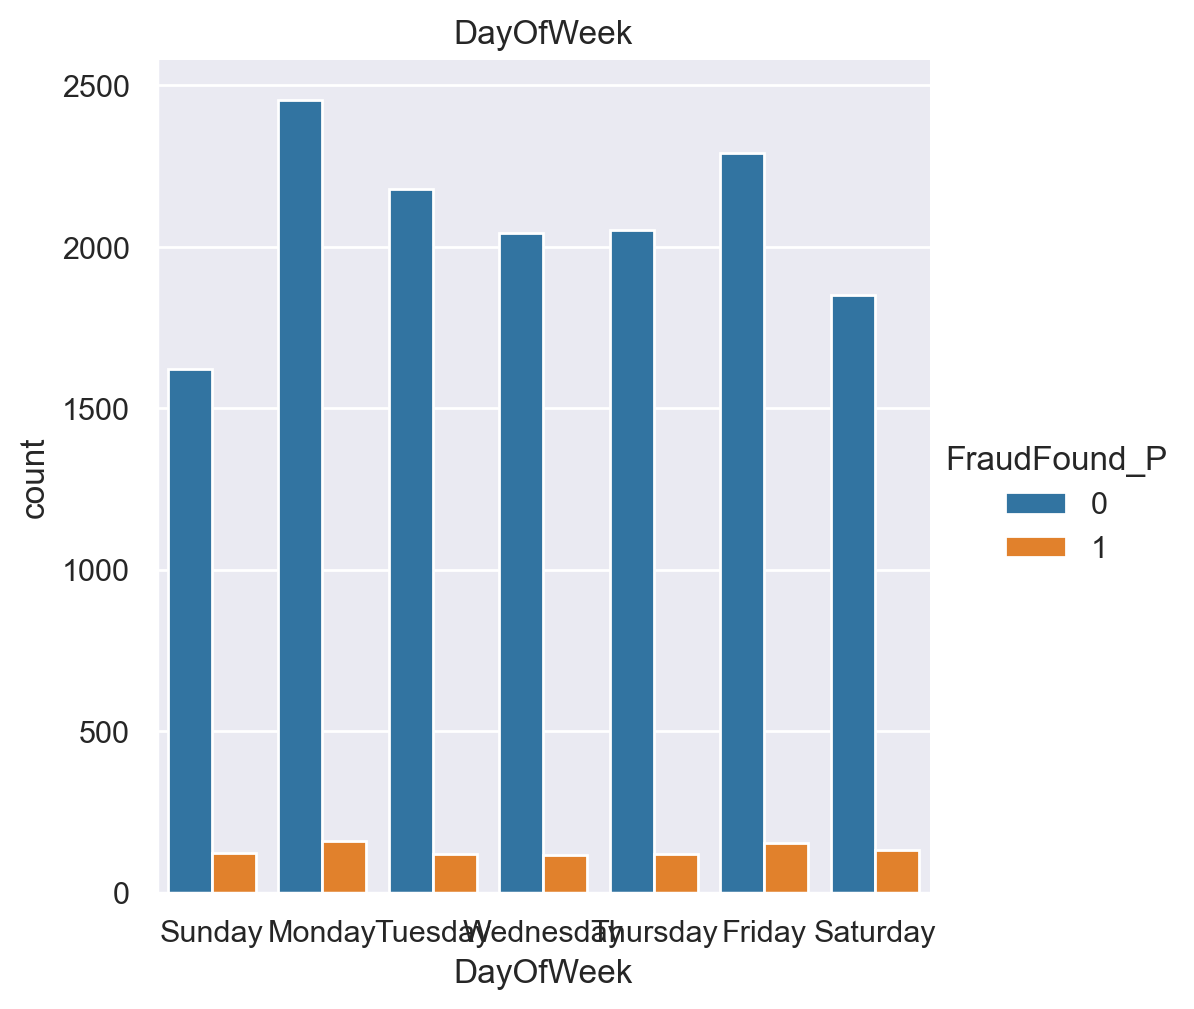

Make


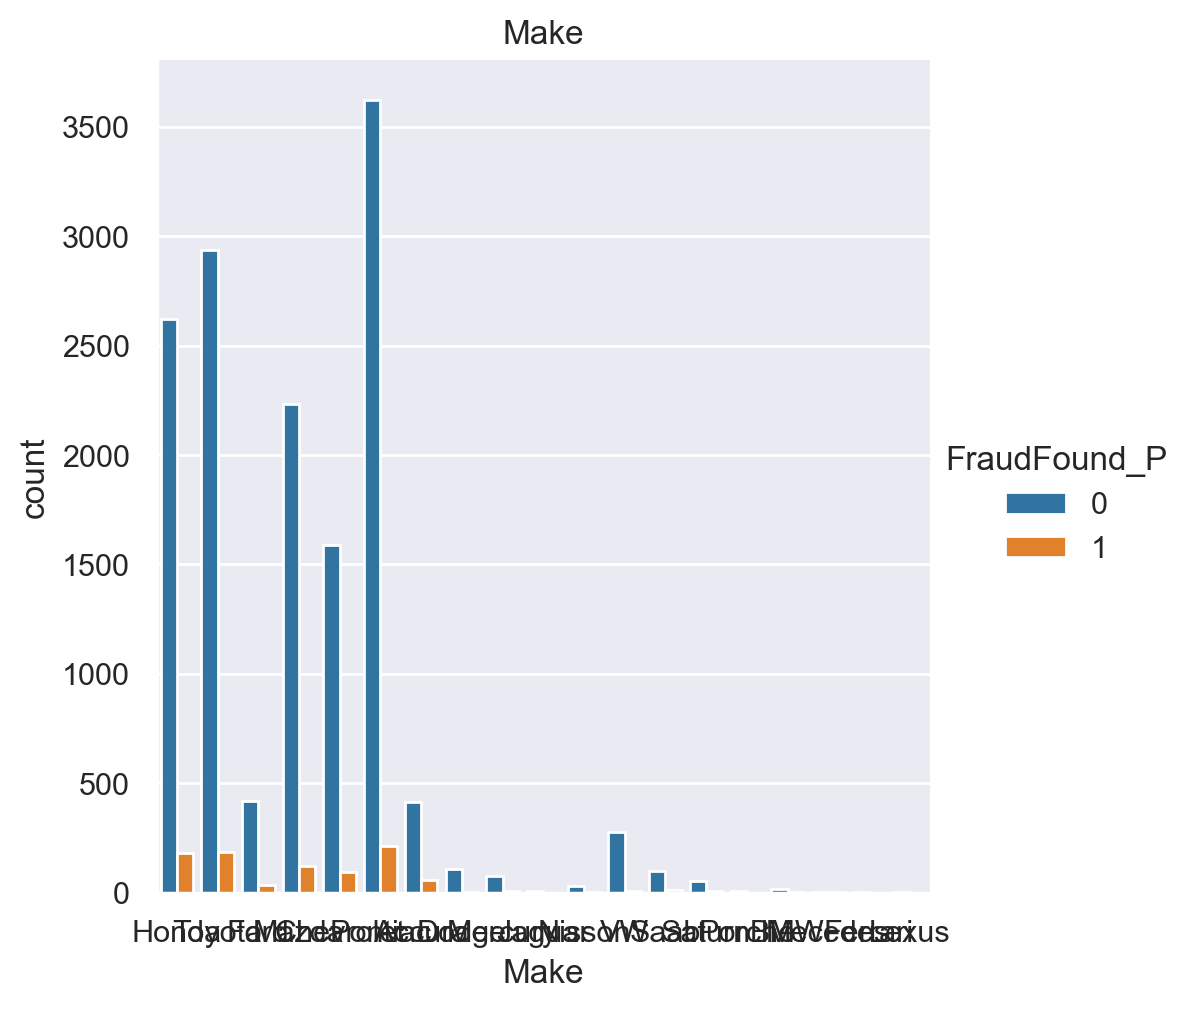

AccidentArea


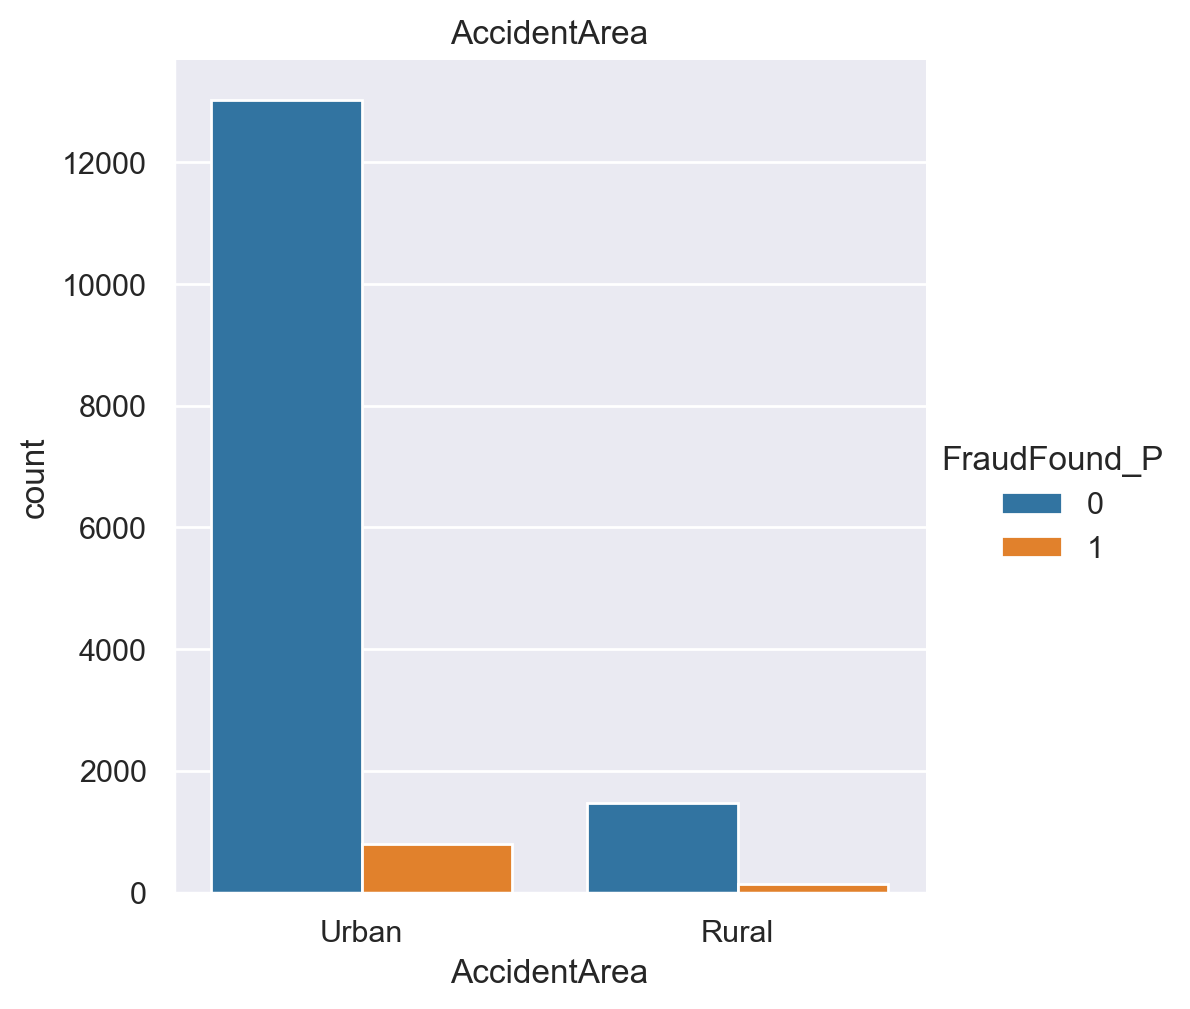

DayOfWeekClaimed


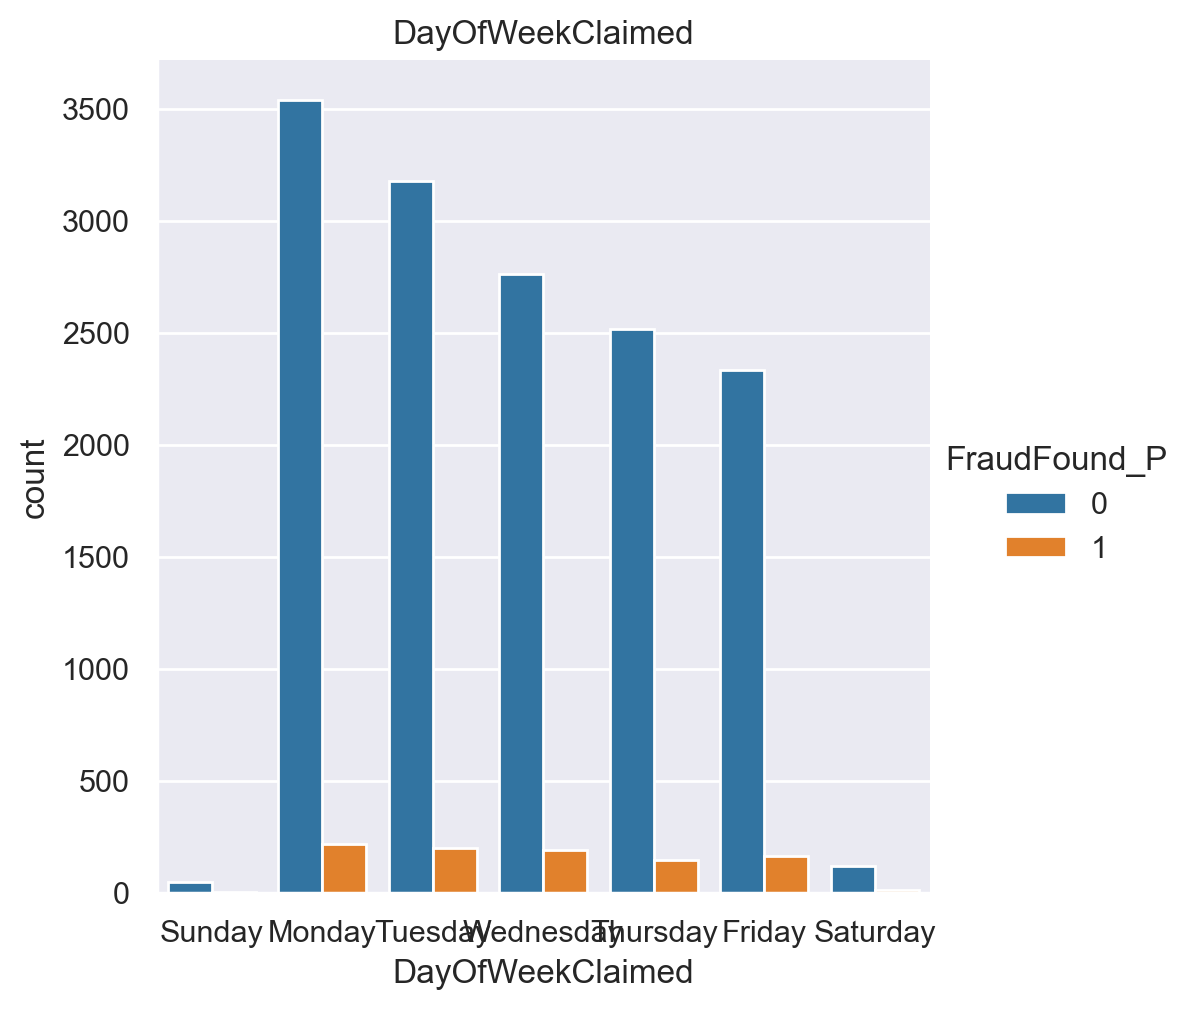

MonthClaimed


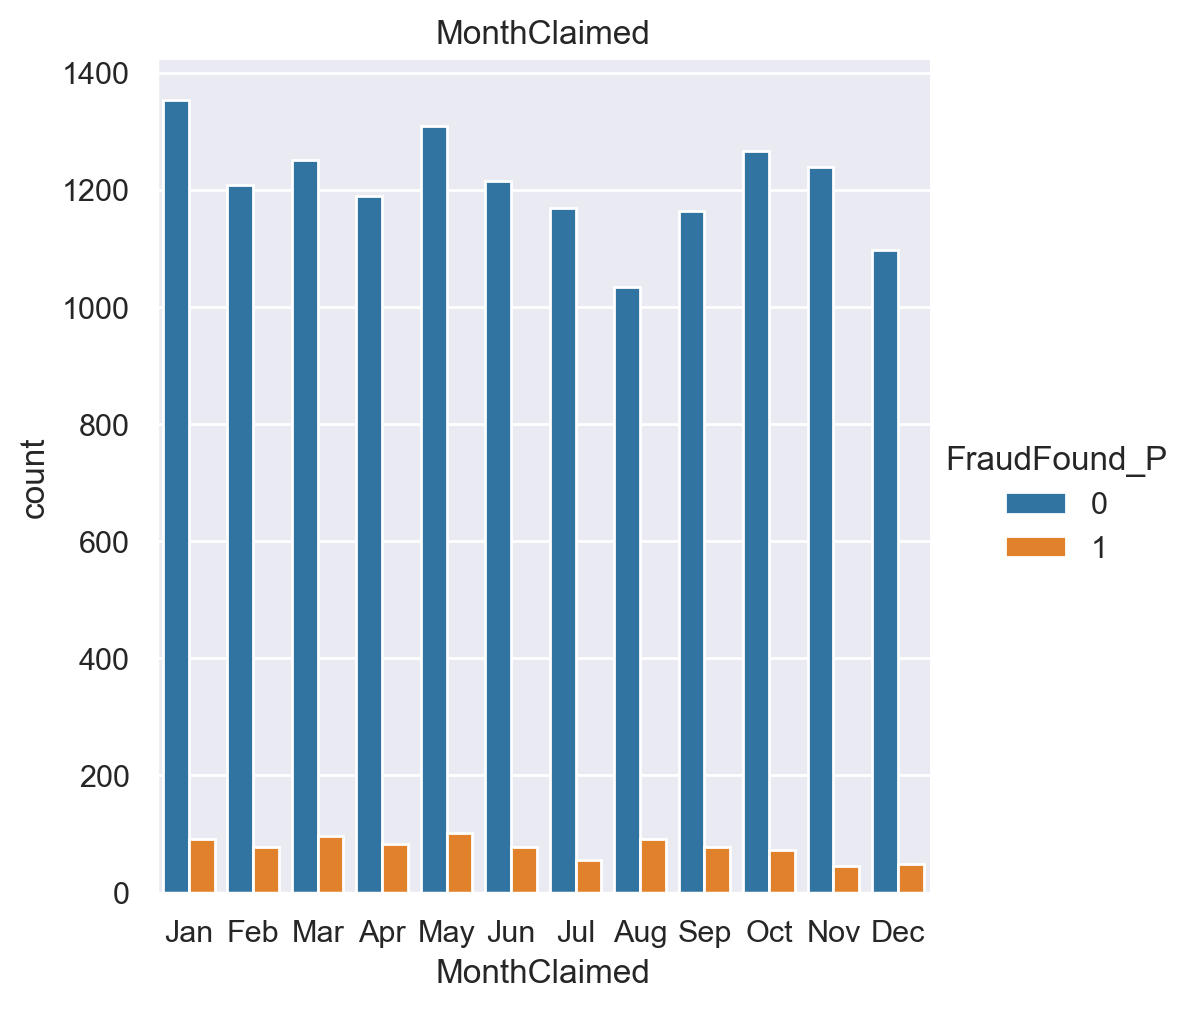

Sex


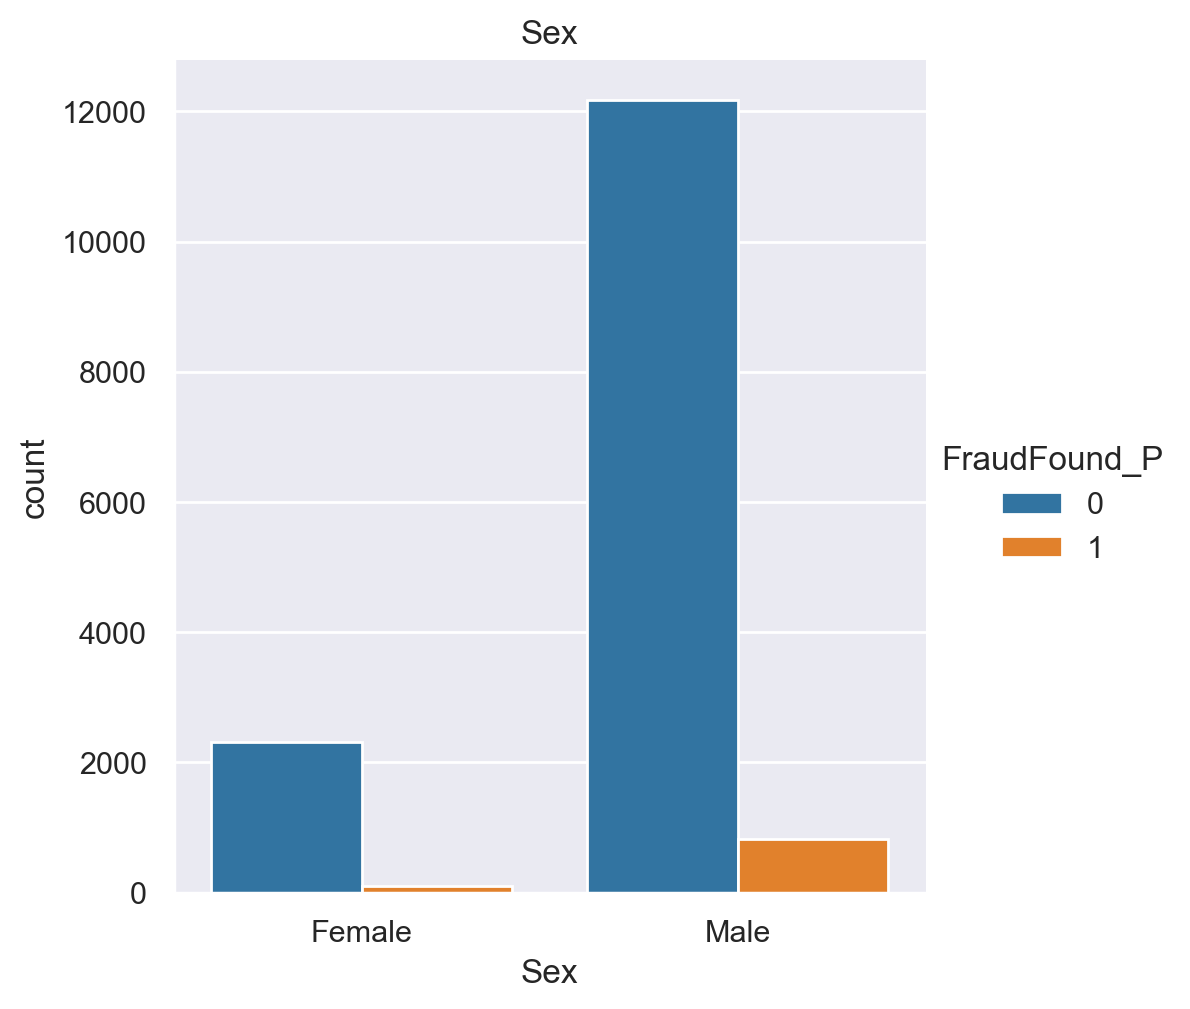

MaritalStatus


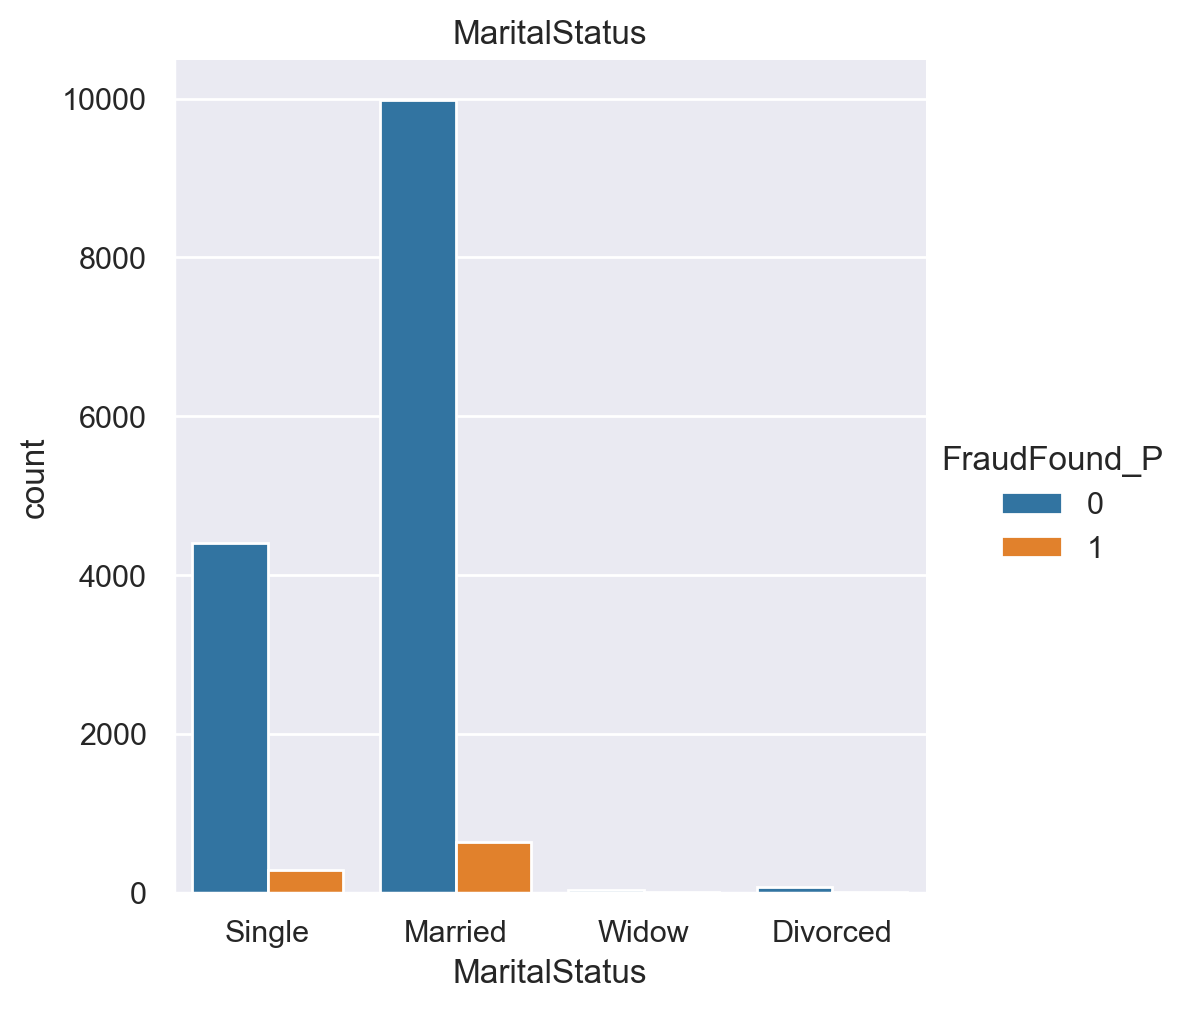

Fault


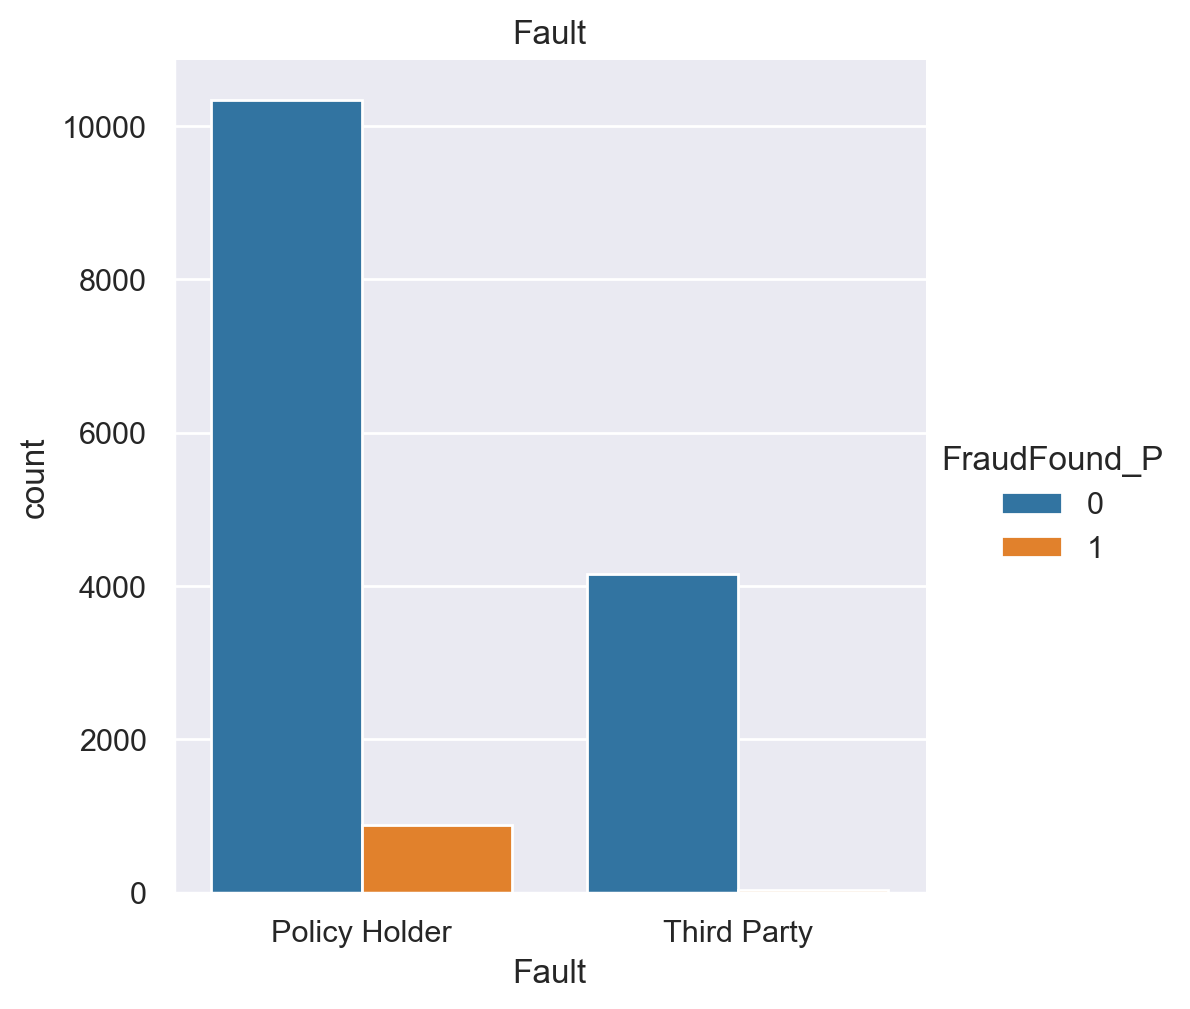

PolicyType


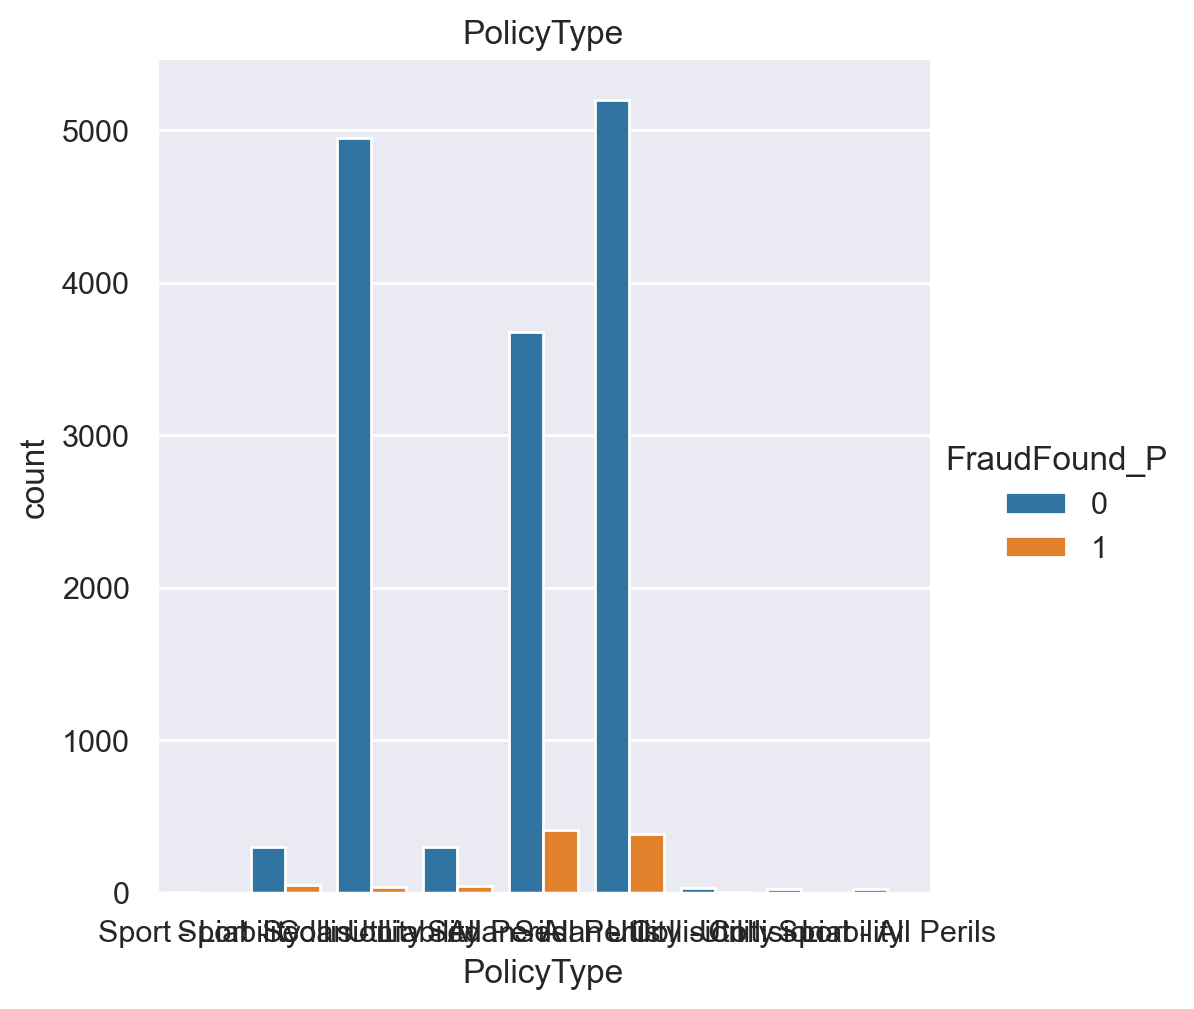

VehicleCategory


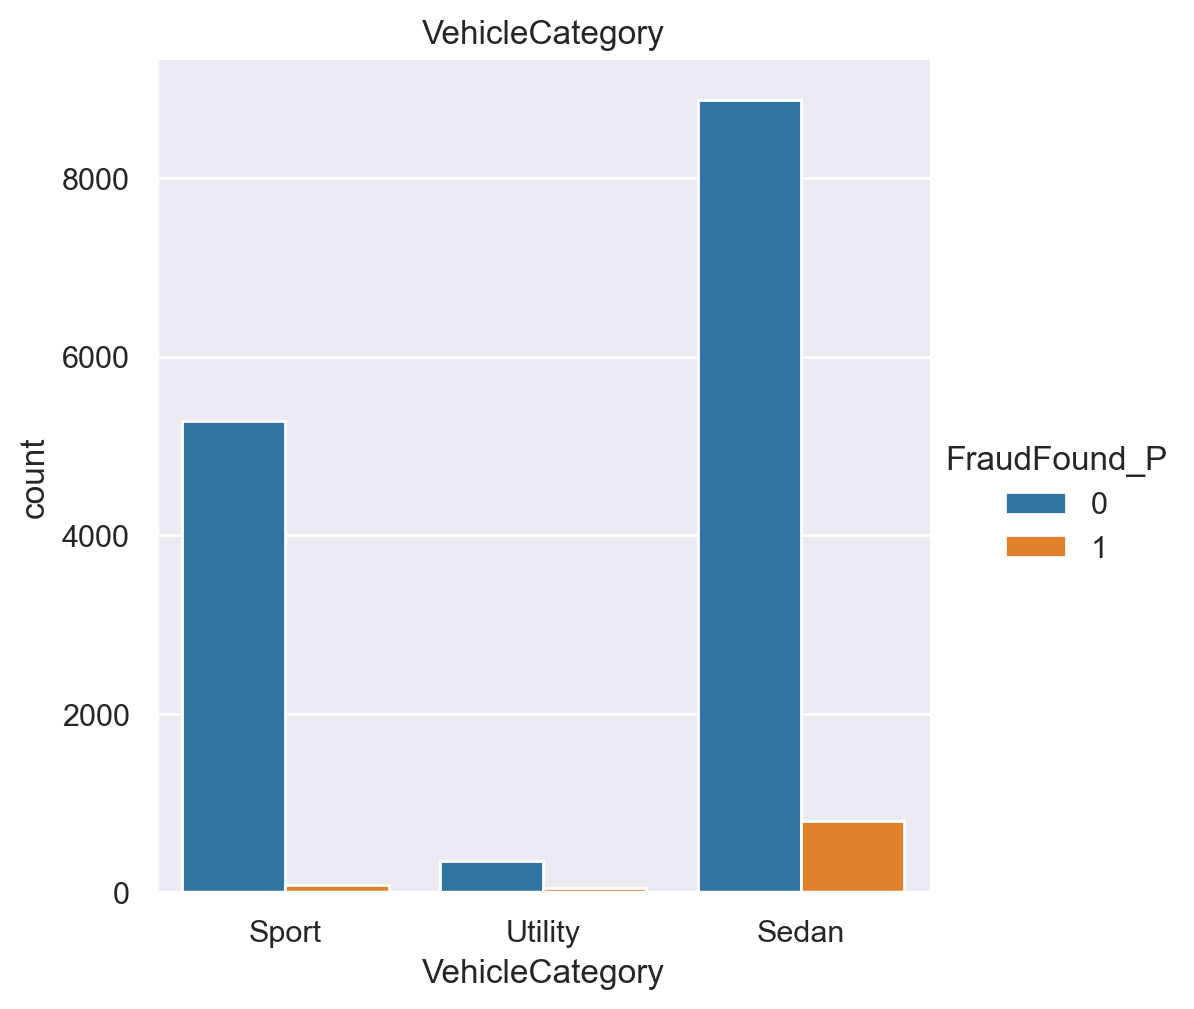

VehiclePrice


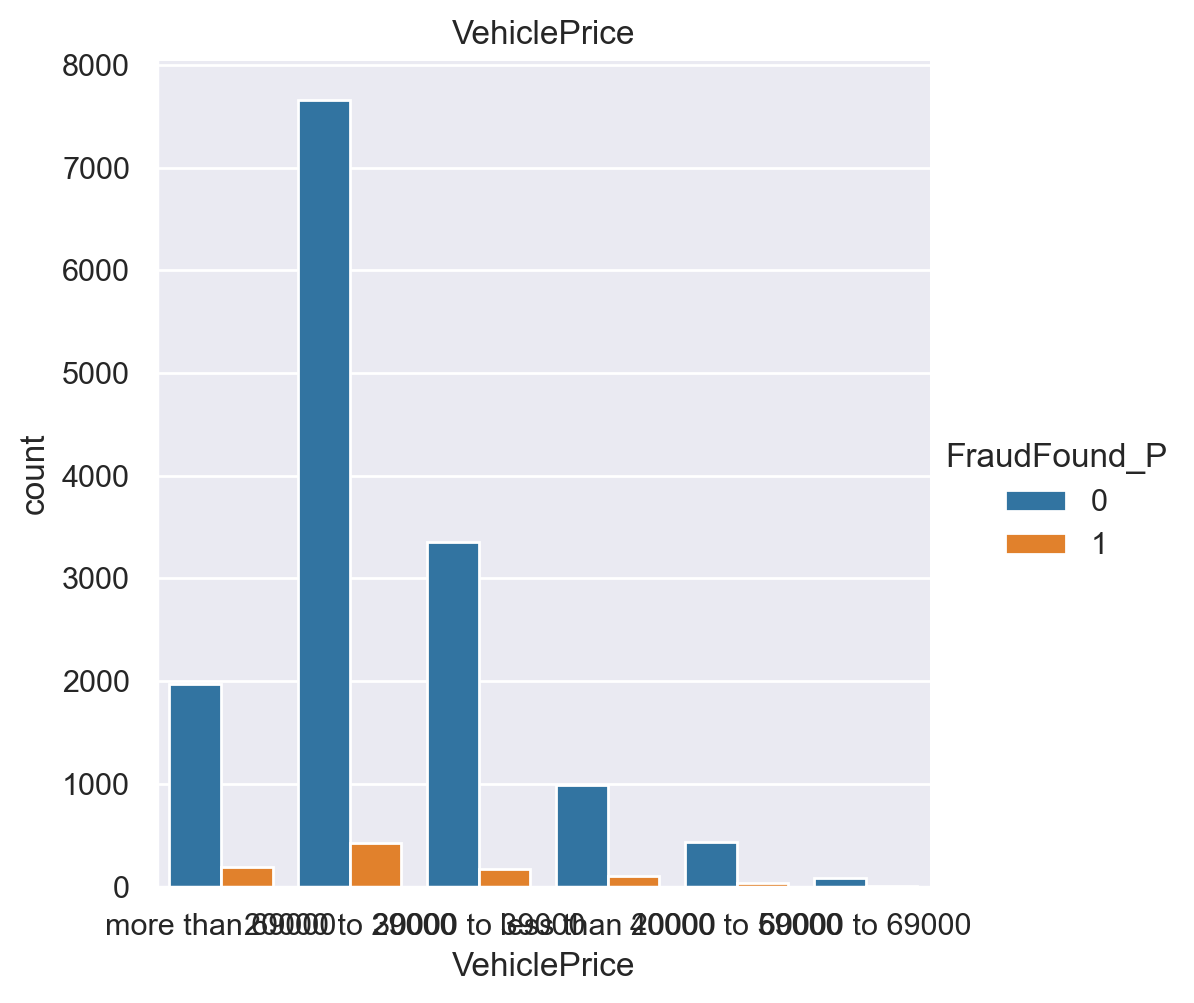

Days_Policy_Accident


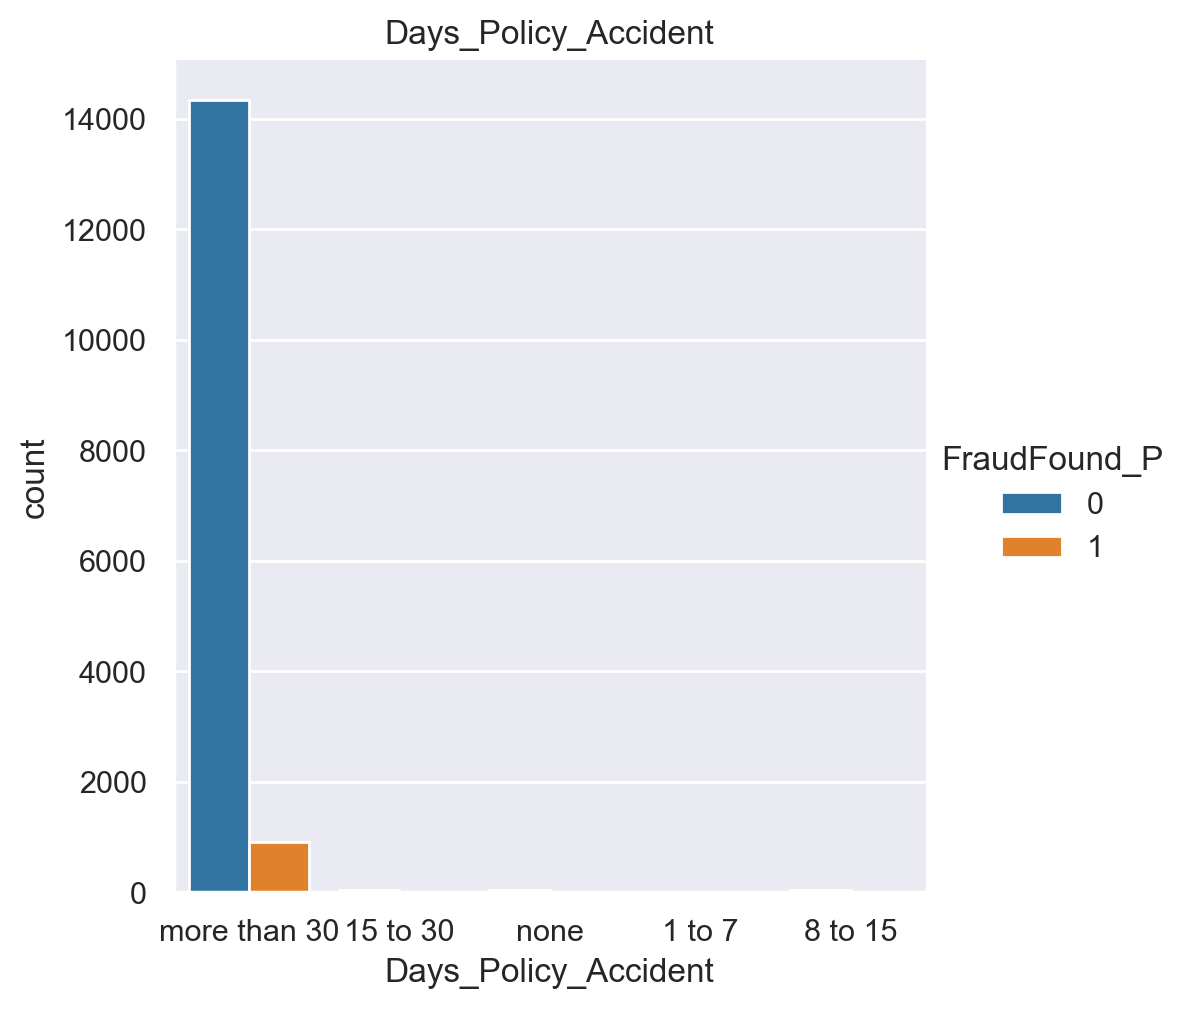

Days_Policy_Claim


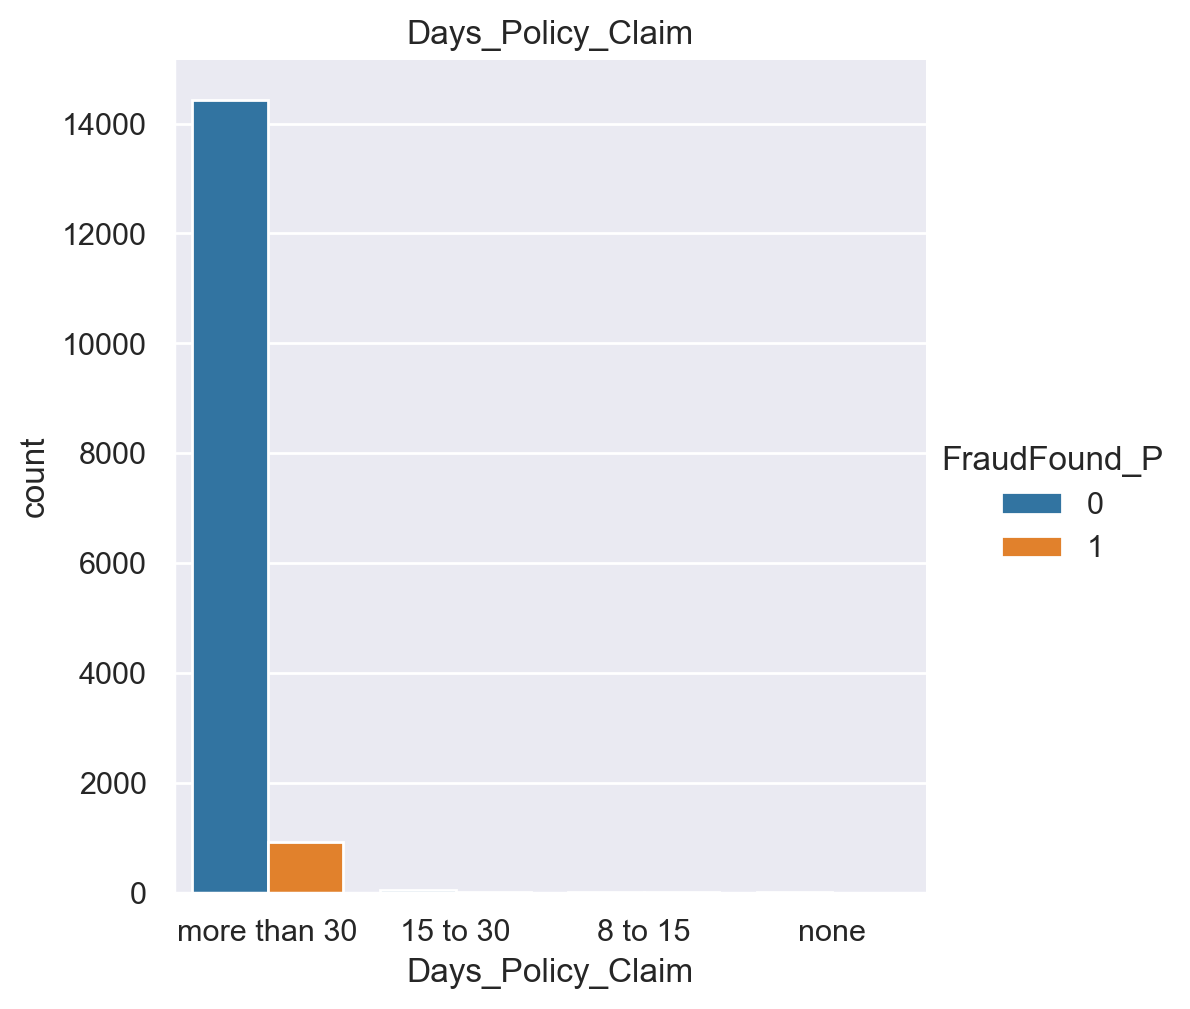

PastNumberOfClaims


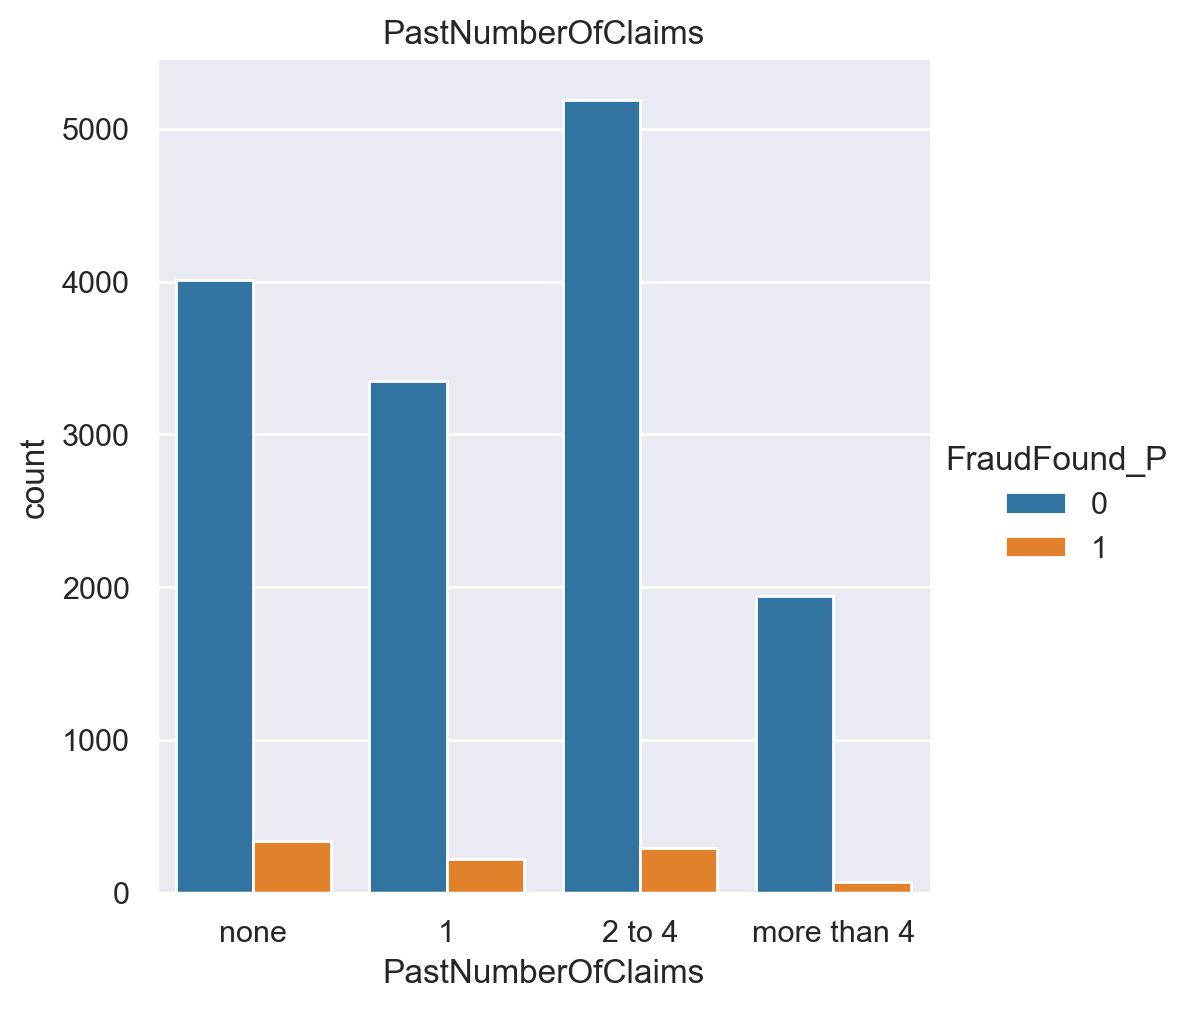

AgeOfVehicle


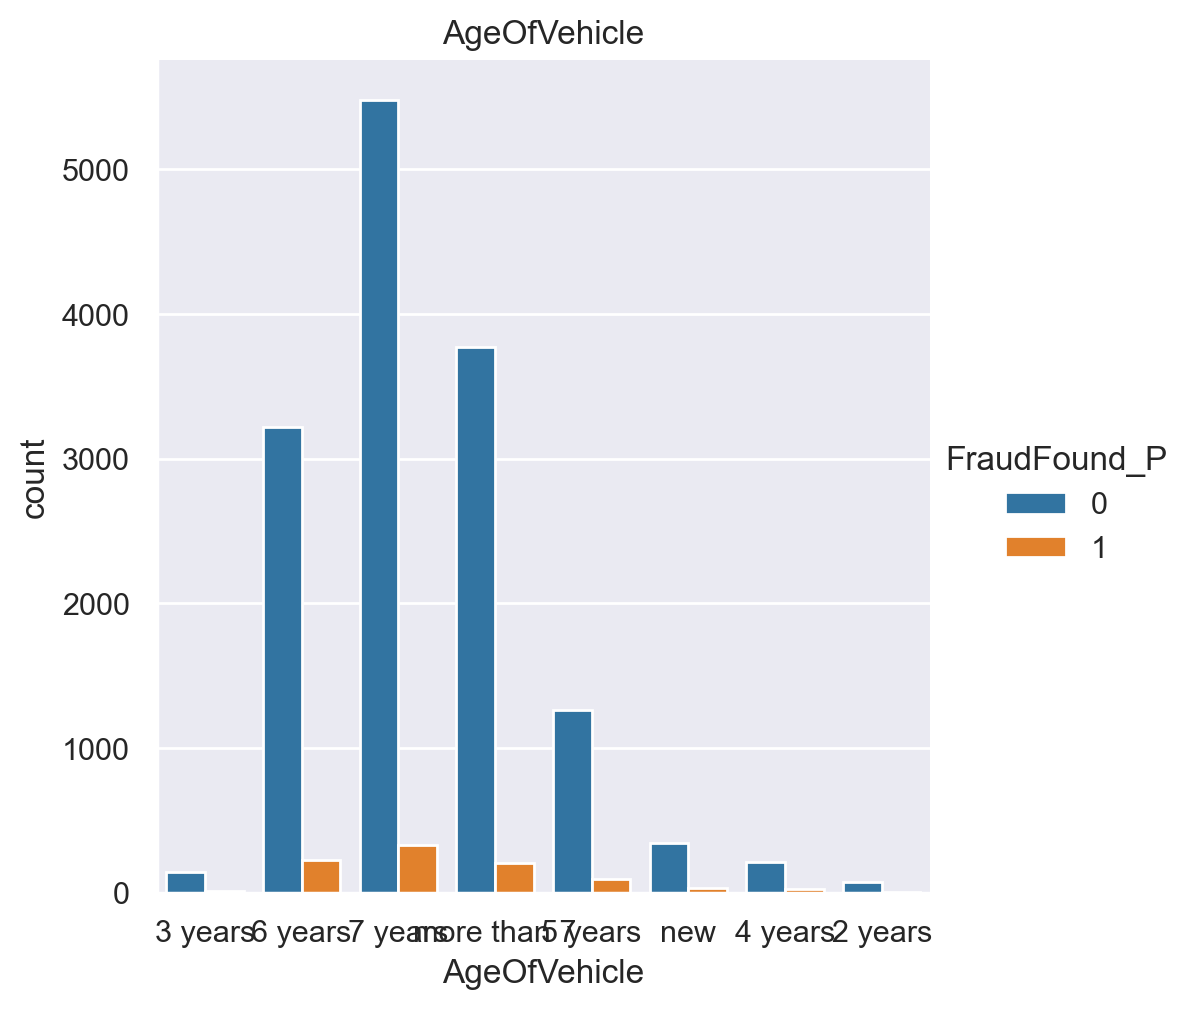

AgeOfPolicyHolder


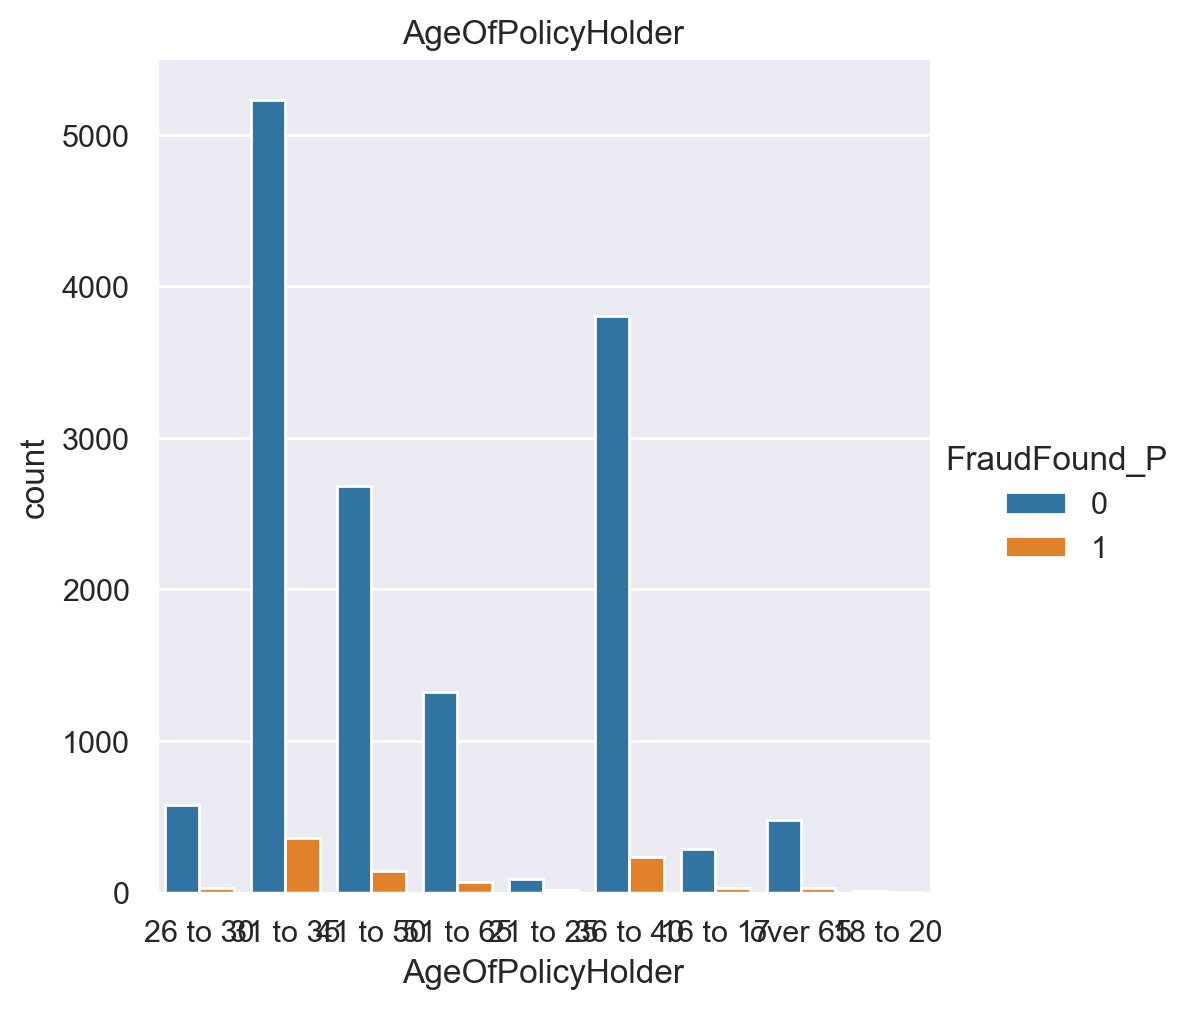

PoliceReportFiled


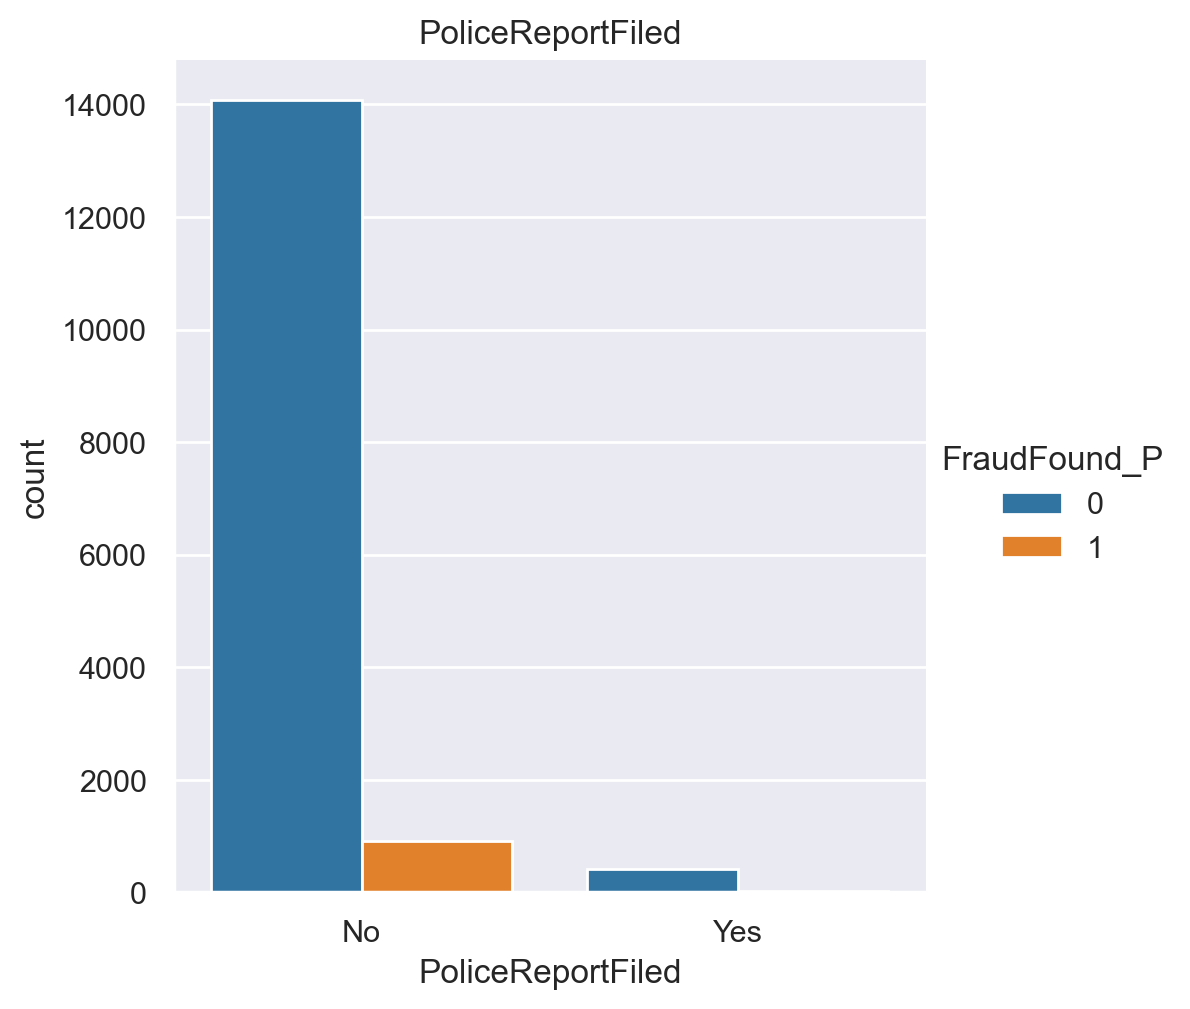

WitnessPresent


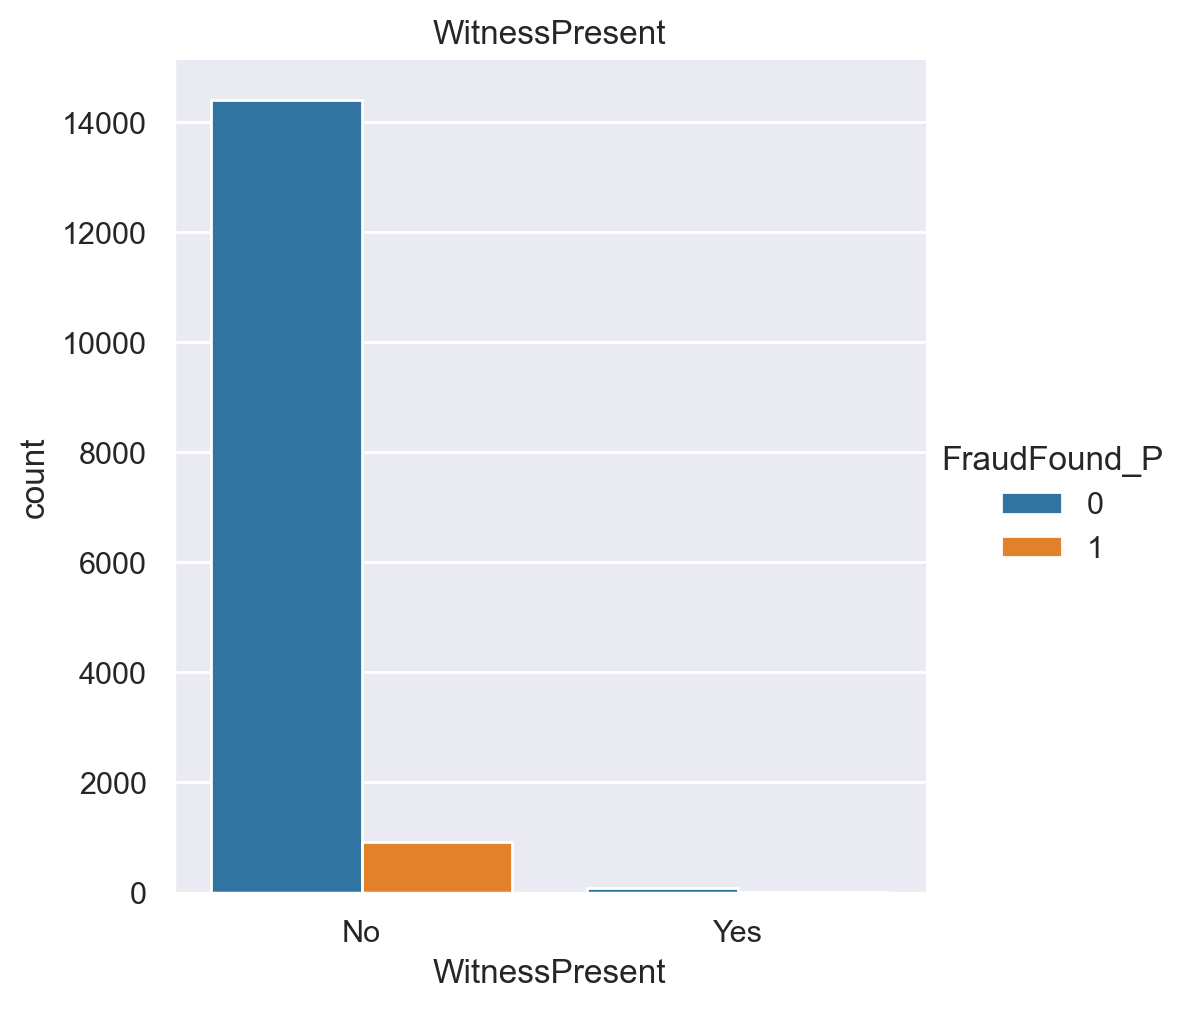

AgentType


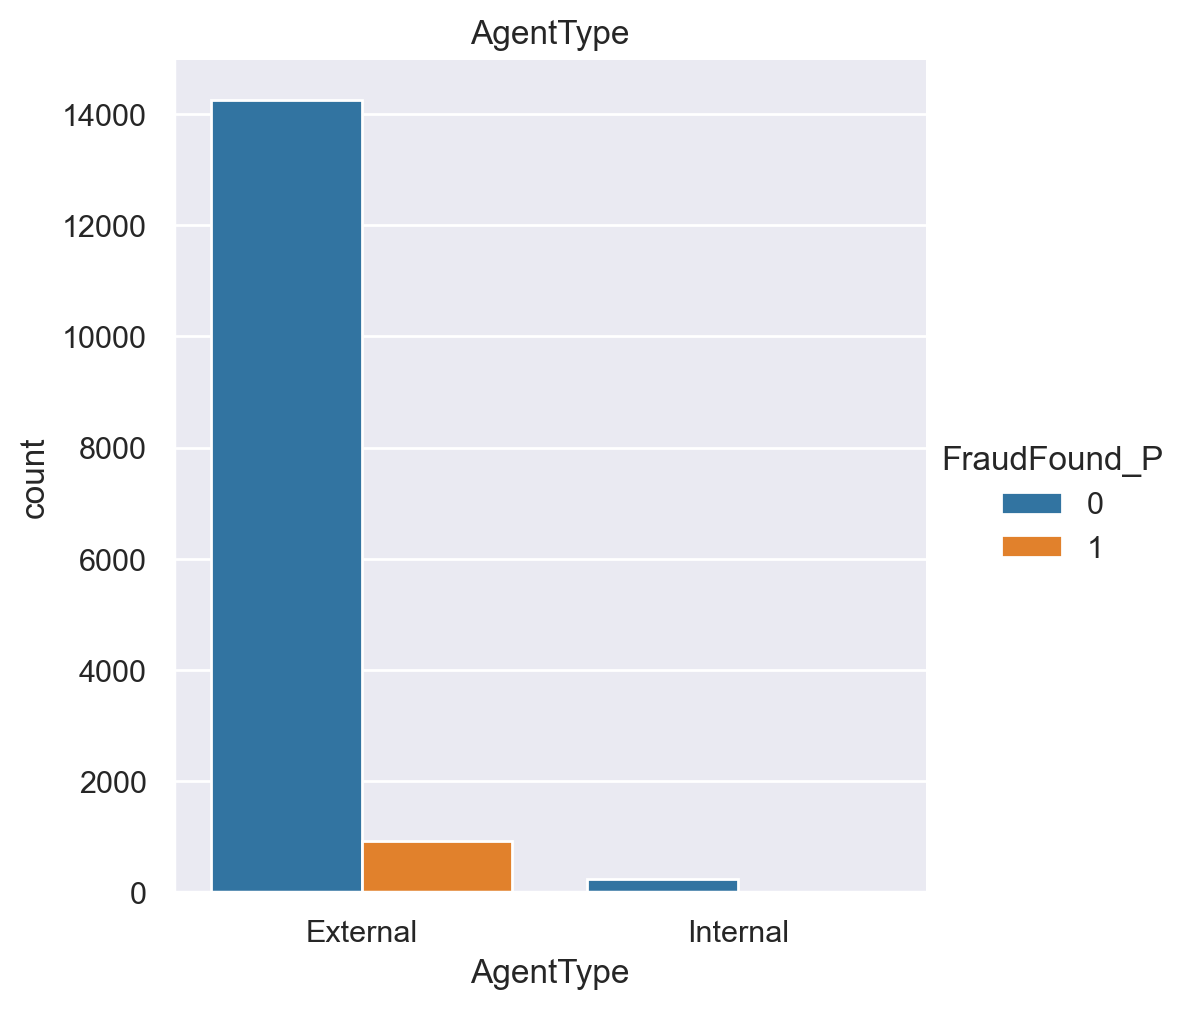

NumberOfSuppliments


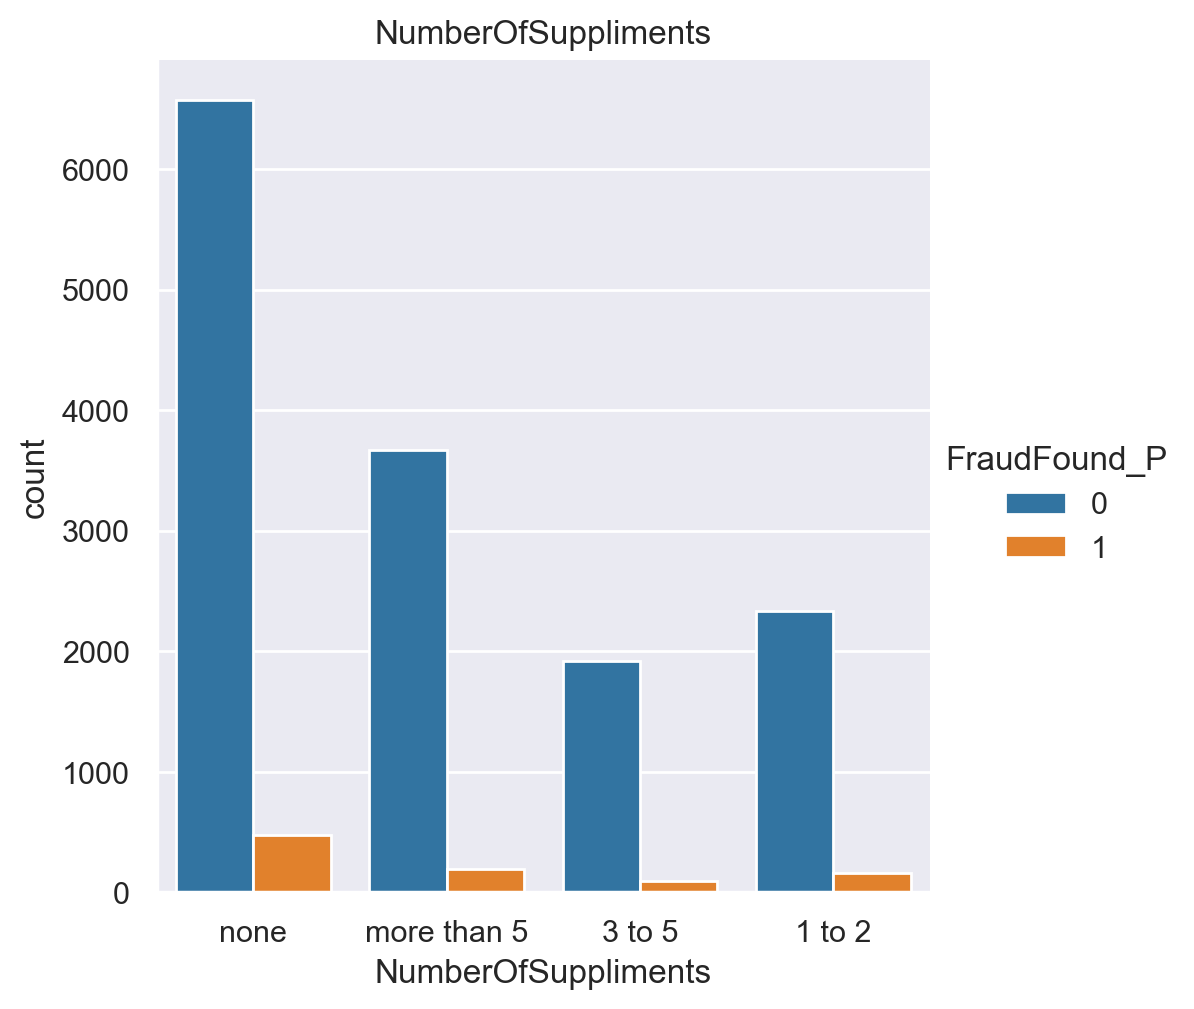

AddressChange_Claim


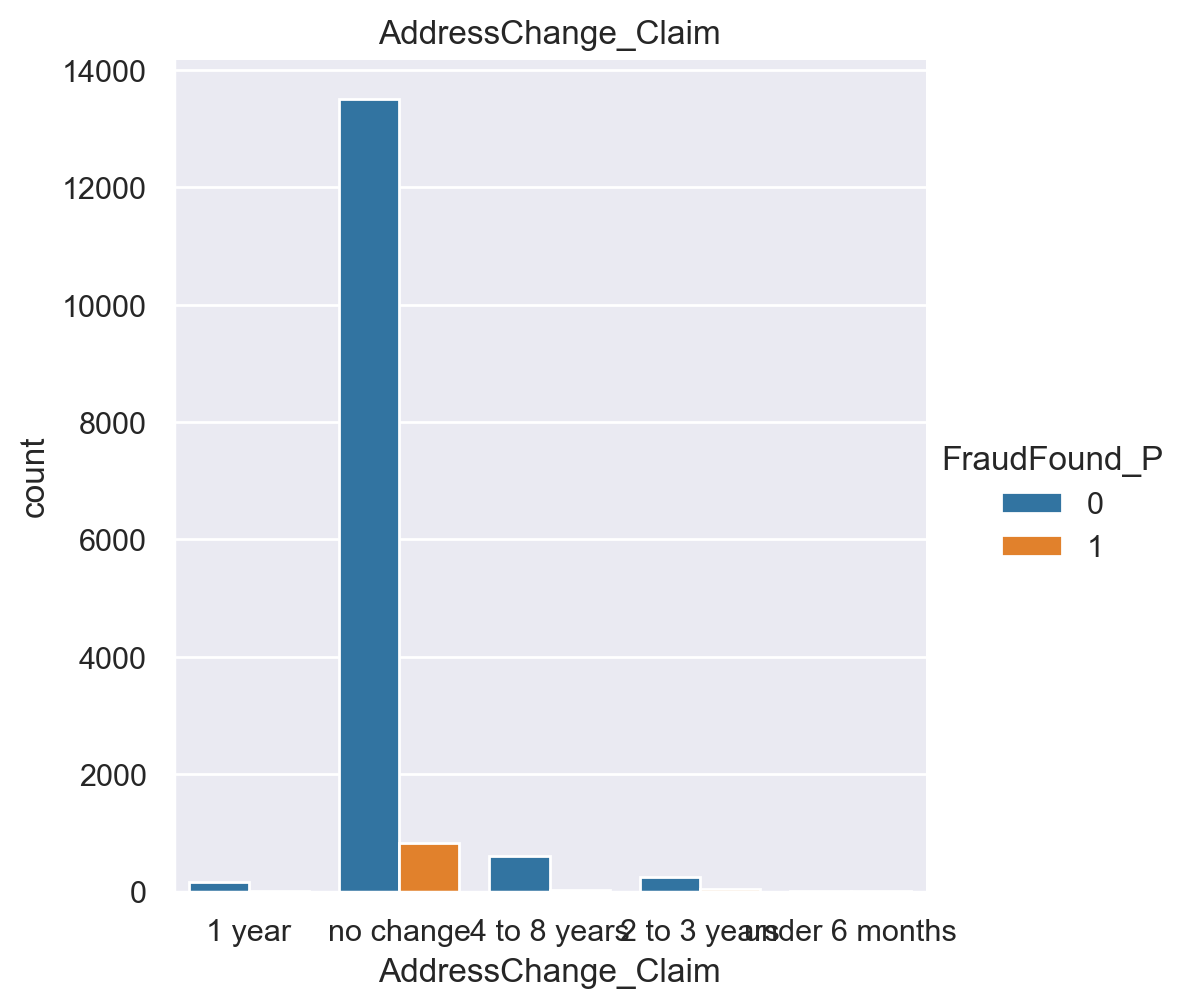

NumberOfCars


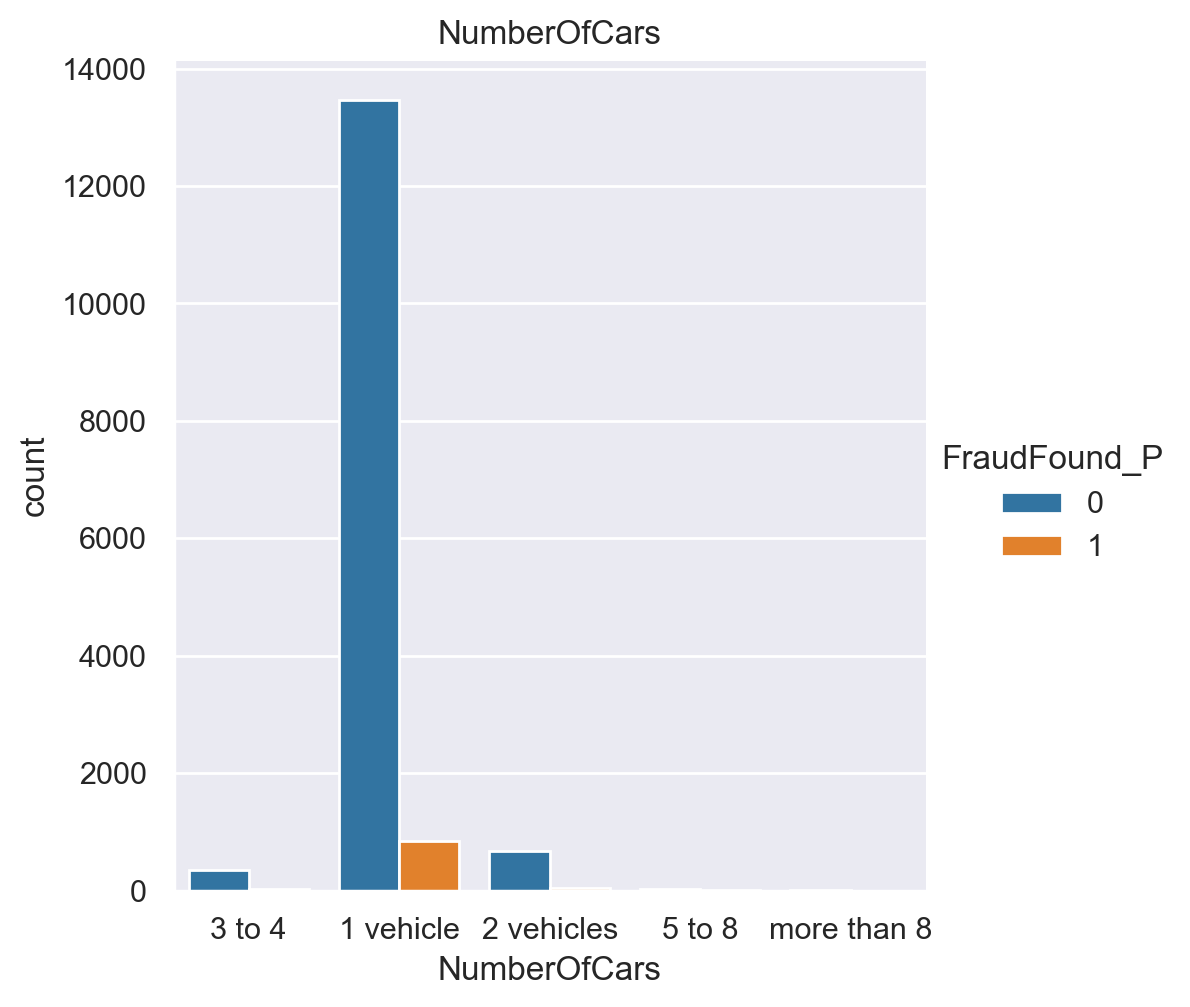

BasePolicy


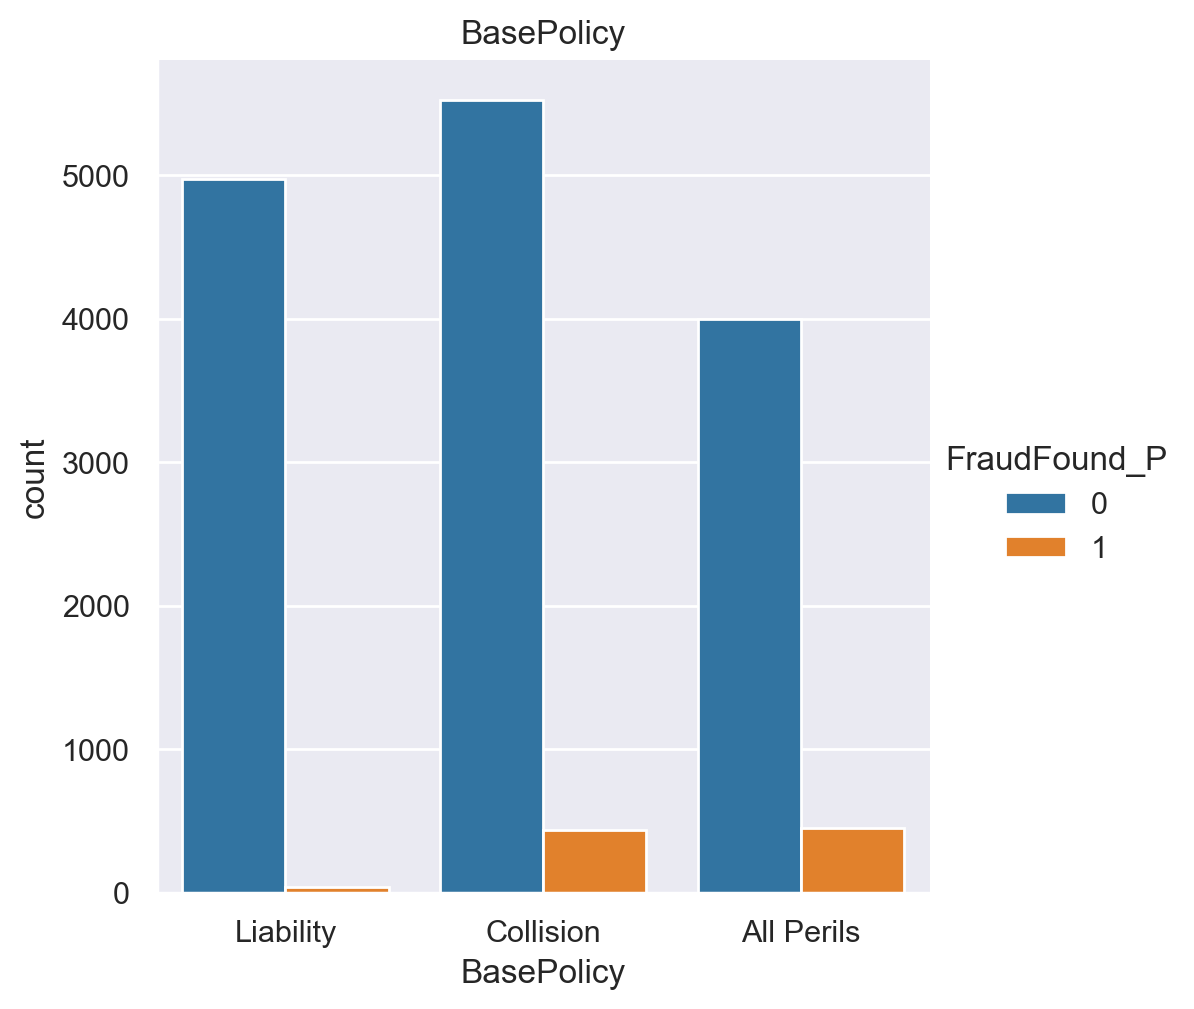

In [214]:
# Count Plots using seaborn
# Put months in correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_order = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']

for i in list(df_claim) :

    if (is_string_dtype(df_claim[i])) :
        print(i)
        if('Month' in i) :  # i == "Month" | i == "MonthClaimed"
            o = month_order
            sns.catplot(x = i,
            hue='FraudFound_P',
            data=df_claim, 
            kind='count',
            order = o)
            plt.title(i)
            
        elif( 'DayOfWeek' in i ) :  # i == 'DayOfWeek' | i == 'DayOfWeekClaimed'
            o = weekday_order
            sns.catplot(x = i,
            hue='FraudFound_P',
            data=df_claim, 
            kind='count',
            order = o)
            plt.title(i)    
            
        else :
            sns.catplot(x = i,
            hue='FraudFound_P',
            data=df_claim, 
            kind='count'
            )
            plt.title(i)
            
        plt.show()
     

    
# DayOfWeek
#print(df_claim['FraudFound_P'])

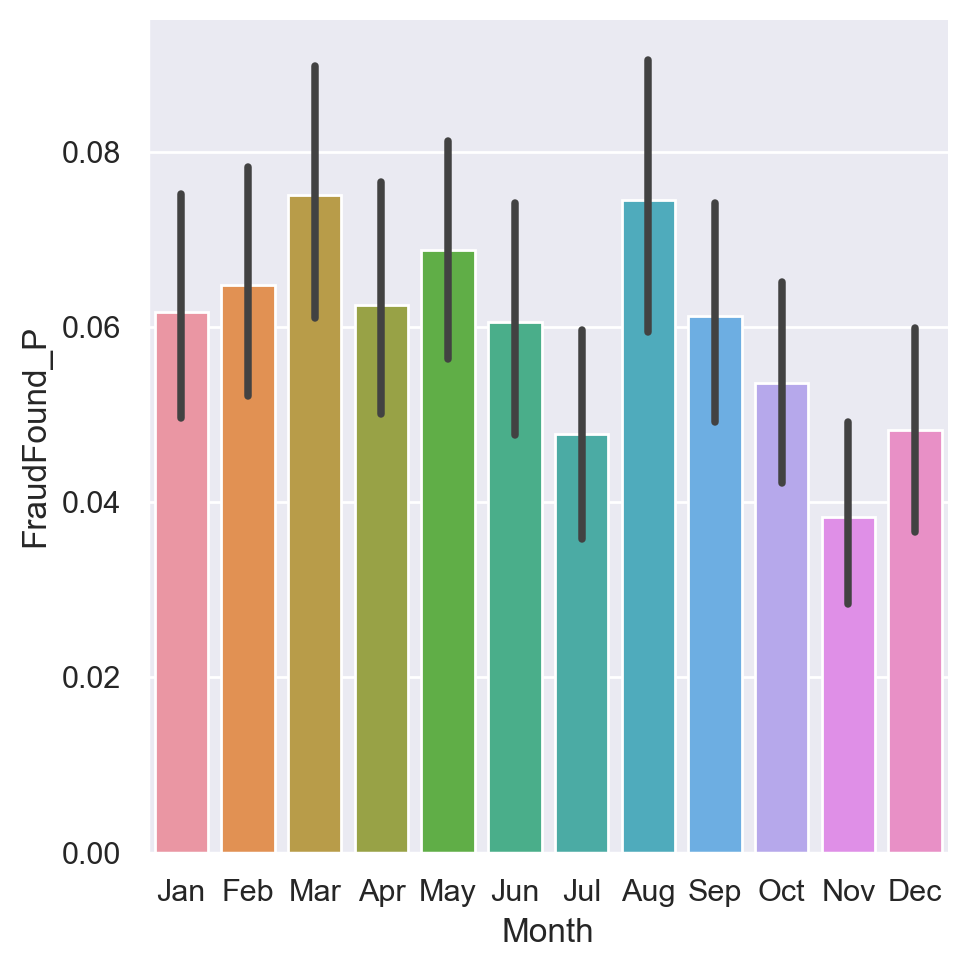

In [188]:
sns.catplot(x='Month',
            y='FraudFound_P',
            data=df_claim, 
            kind='bar',
           order=month_order)
plt.show()

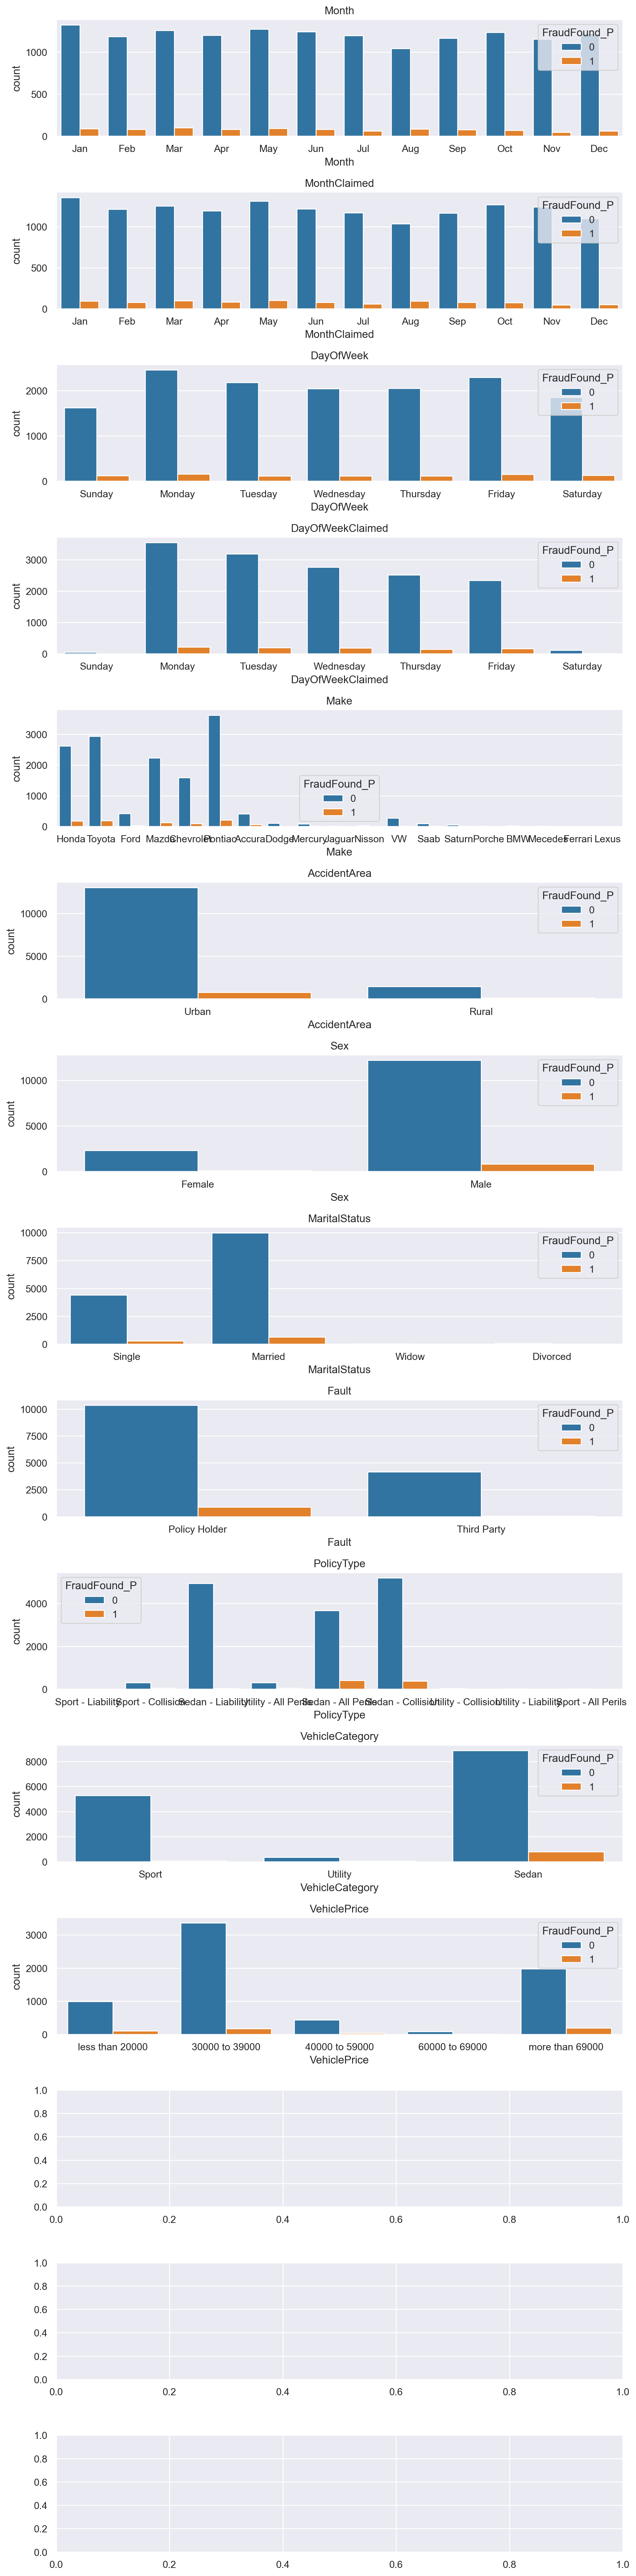

In [187]:
# Plot all catagory data using subplots 8 tables - 8 x 1

fig, ax = plt.subplots(15, figsize=(10,40))
month_order = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(ax=ax[0],
            x='Month',
           data=df_claim,
           hue='FraudFound_P',
           order=month_order)
ax[0].set_title('Month')

sns.countplot(ax=ax[1],
            x='MonthClaimed',
           data=df_claim,
           hue='FraudFound_P',
           order=month_order)
ax[1].set_title('MonthClaimed')


sns.countplot(ax=ax[2],
            x='DayOfWeek',
           data=df_claim,
           hue='FraudFound_P',
           order=['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax[2].set_title('DayOfWeek')

sns.countplot(ax=ax[3],
            x='DayOfWeekClaimed',
           data=df_claim,
           hue='FraudFound_P',
          order=['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax[3].set_title('DayOfWeekClaimed')

sns.countplot(ax=ax[4],
            x='Make',
           data=df_claim,
           hue='FraudFound_P'
           )
ax[4].set_title('Make')


sns.countplot(ax=ax[5],
            x='AccidentArea',
           data=df_claim,
           hue='FraudFound_P'
           )
ax[5].set_title('AccidentArea')


sns.countplot(ax=ax[6],
            x='Sex',
           data=df_claim,
           hue='FraudFound_P'
           )
ax[6].set_title('Sex')

sns.countplot(ax=ax[7],
            x='MaritalStatus',
           data=df_claim,
           hue='FraudFound_P'
           )
ax[7].set_title('MaritalStatus')

sns.countplot(ax=ax[8],
            x='Fault',
           data=df_claim,
           hue='FraudFound_P'
           )
ax[8].set_title('Fault')

sns.countplot(ax=ax[9],
            x='PolicyType',
           data=df_claim,
           hue='FraudFound_P'
           )
ax[9].set_title('PolicyType')


sns.countplot(ax=ax[10],
            x='VehicleCategory',
           data=df_claim,
           hue='FraudFound_P'
           )
ax[10].set_title('VehicleCategory')


sns.countplot(ax=ax[11],
            x='VehiclePrice',
           data=df_claim,
           hue='FraudFound_P',
           order=['less than 20000','30000 to 39000' ,'40000 to 59000','60000 to 69000','more than 69000'])
ax[11].set_title('VehiclePrice')


plt.tight_layout()
plt.show()

In [10]:
df_claim['Fault'].value_counts()

Policy Holder    11230
Third Party       4190
Name: Fault, dtype: int64

### Step 5: <span style="color:green">EDA and Exploring your data with Pandas</span> 

The rest of these questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 


In [11]:
df_claim['Make'].value_counts()

Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64

<AxesSubplot:>

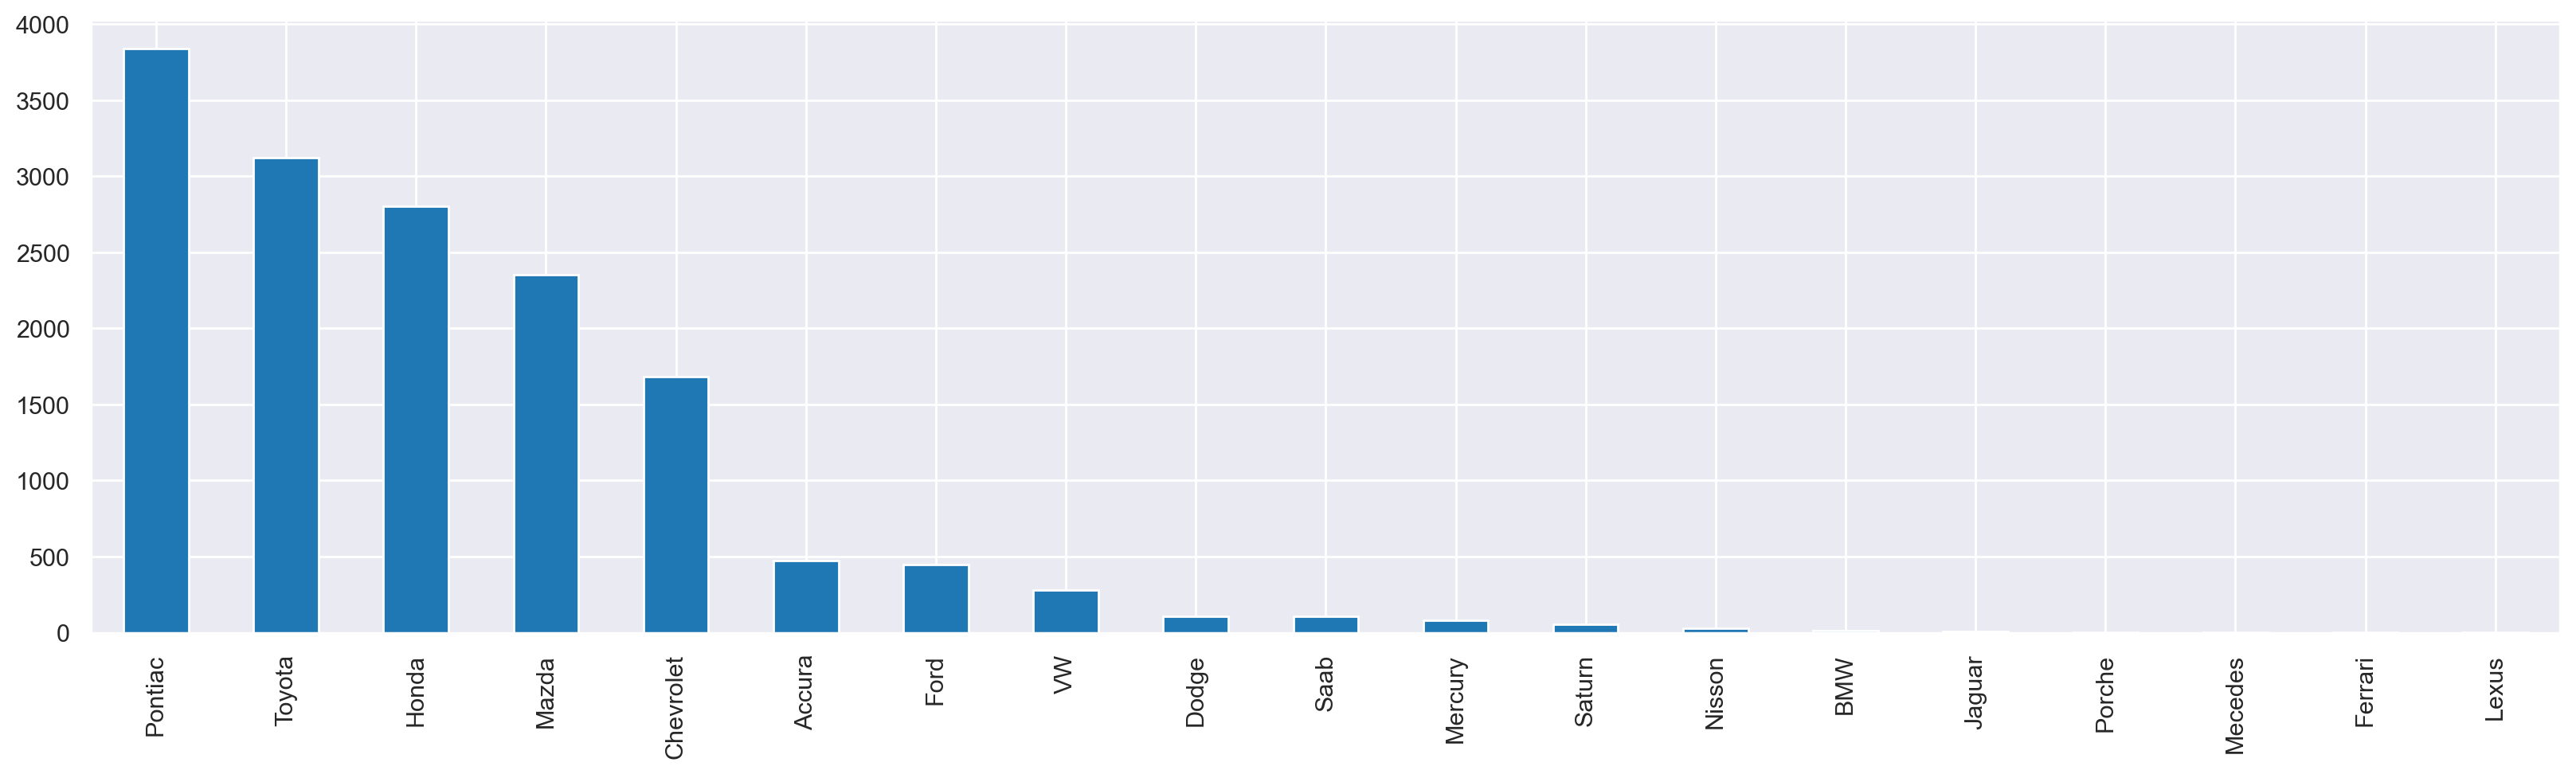

In [183]:
df_claim_make = df_claim['Make'].value_counts()
type(df_claim_make)
df_claim_make.plot(kind='bar')

In [165]:
cols = [['WeekOfMonth','WeekOfMonthClaimed','Age', 'Deductible', 'DriverRating', 'RepNumber' ]]
df1 = df_claim.loc[:, df_claim.columns.isin(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'Deductible', 
                                             'DriverRating', 'RepNumber'])]
df1.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating
0,5,1,21,12,300,1
1,3,4,34,15,400,4
2,5,2,47,7,400,3
3,2,1,65,4,400,2
4,5,2,27,3,400,1


In [ ]:
# built-in pandas method df.plot(kind='box')
df1.plot(kind='box') 
plt.title('Fraud Box Plot')
plt.show()

<div class='alert alert-block alert-warning'>
    Wrong.difernet scale so plot 3 rows of 2 barchars.
</div>

In [ ]:
# step 1: Get list of columns
ListOfVar = list(df1)

# print columns
print(ListOfVar)

# Step 2: for x in list :

for i in ListOfVar :
     # print(df_fraud[i])
    ax1 = df_fraud[i].plot(kind='density')  # Looping through every item in the df
    plt.title(i)
    plt.show()



### Step 5b: <span style="color:green">EDA and Exploring your data with Pandas</span> 
#### Step 5b: <span style="color:green">Filter DatFrame Not_Fraud and Fraud </span> 

The rest of these questions will have you focus on using the following Pandas Skills:

You would have noted the datasets we have contain a Fraud (1 or 0) Variable that indicate whether the claim is Fraud FraudFound_P (1) or whether the claim is legitimate FraudFound_P (0).

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 

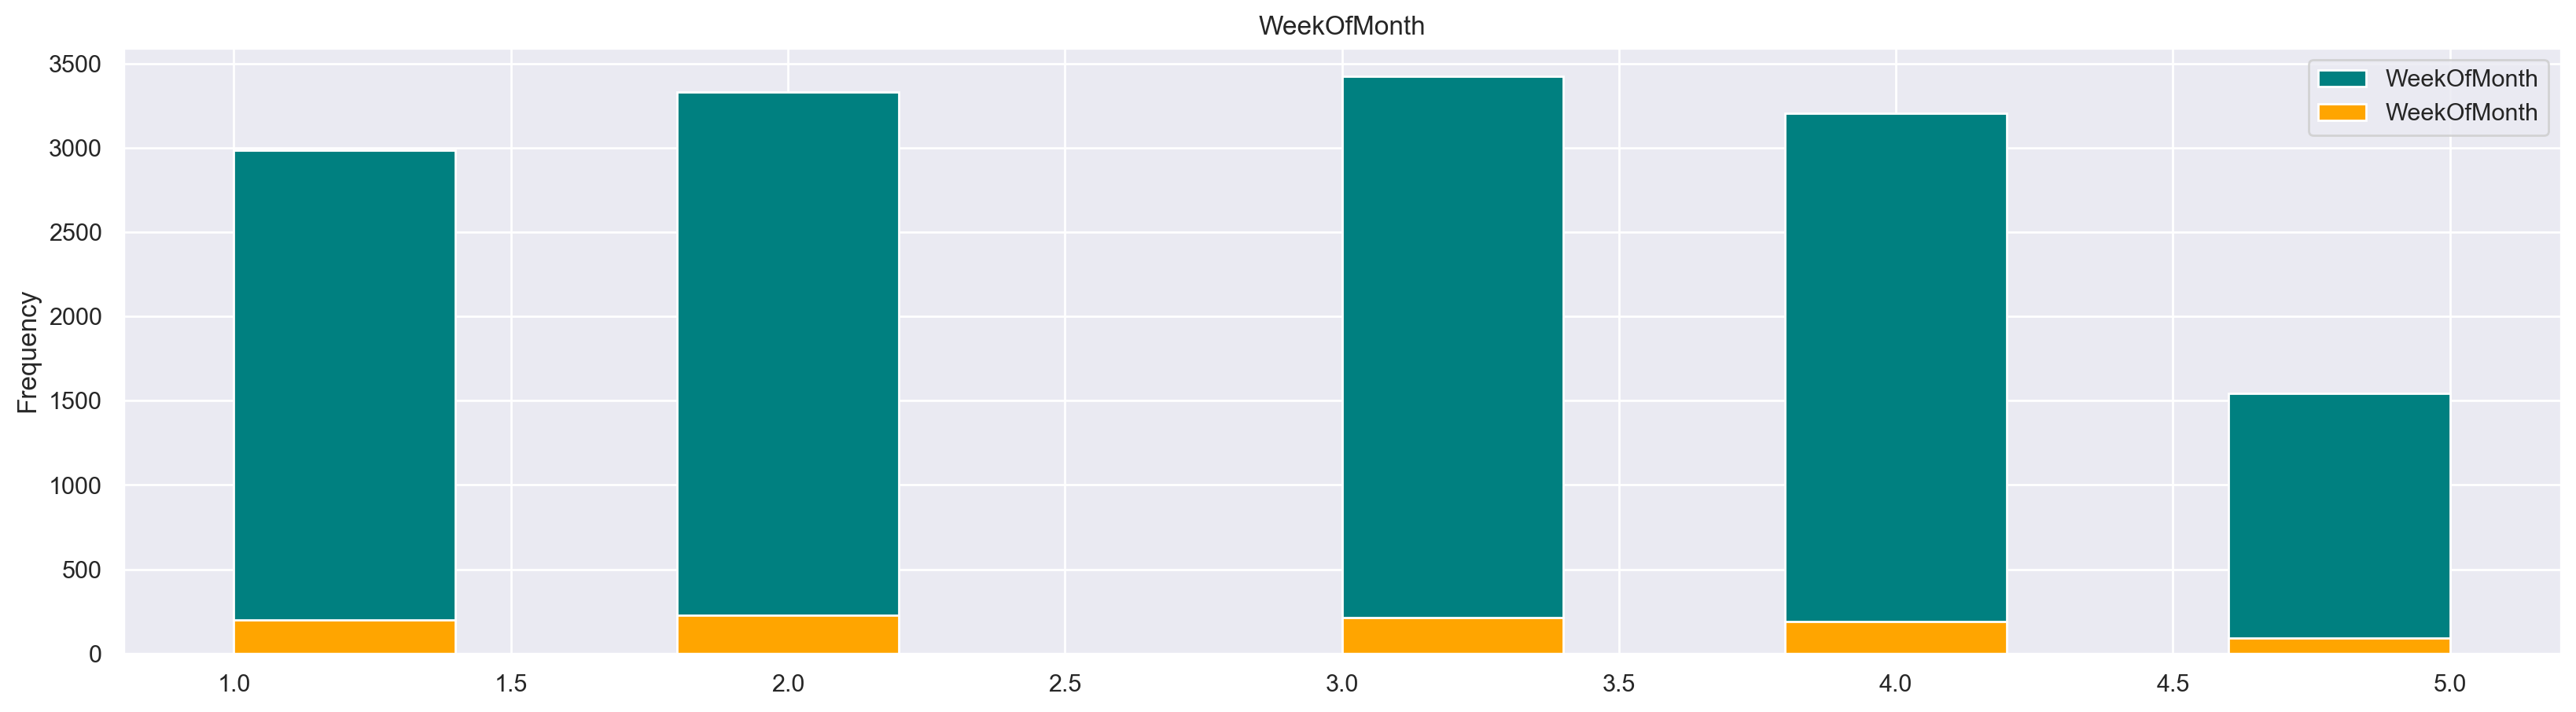

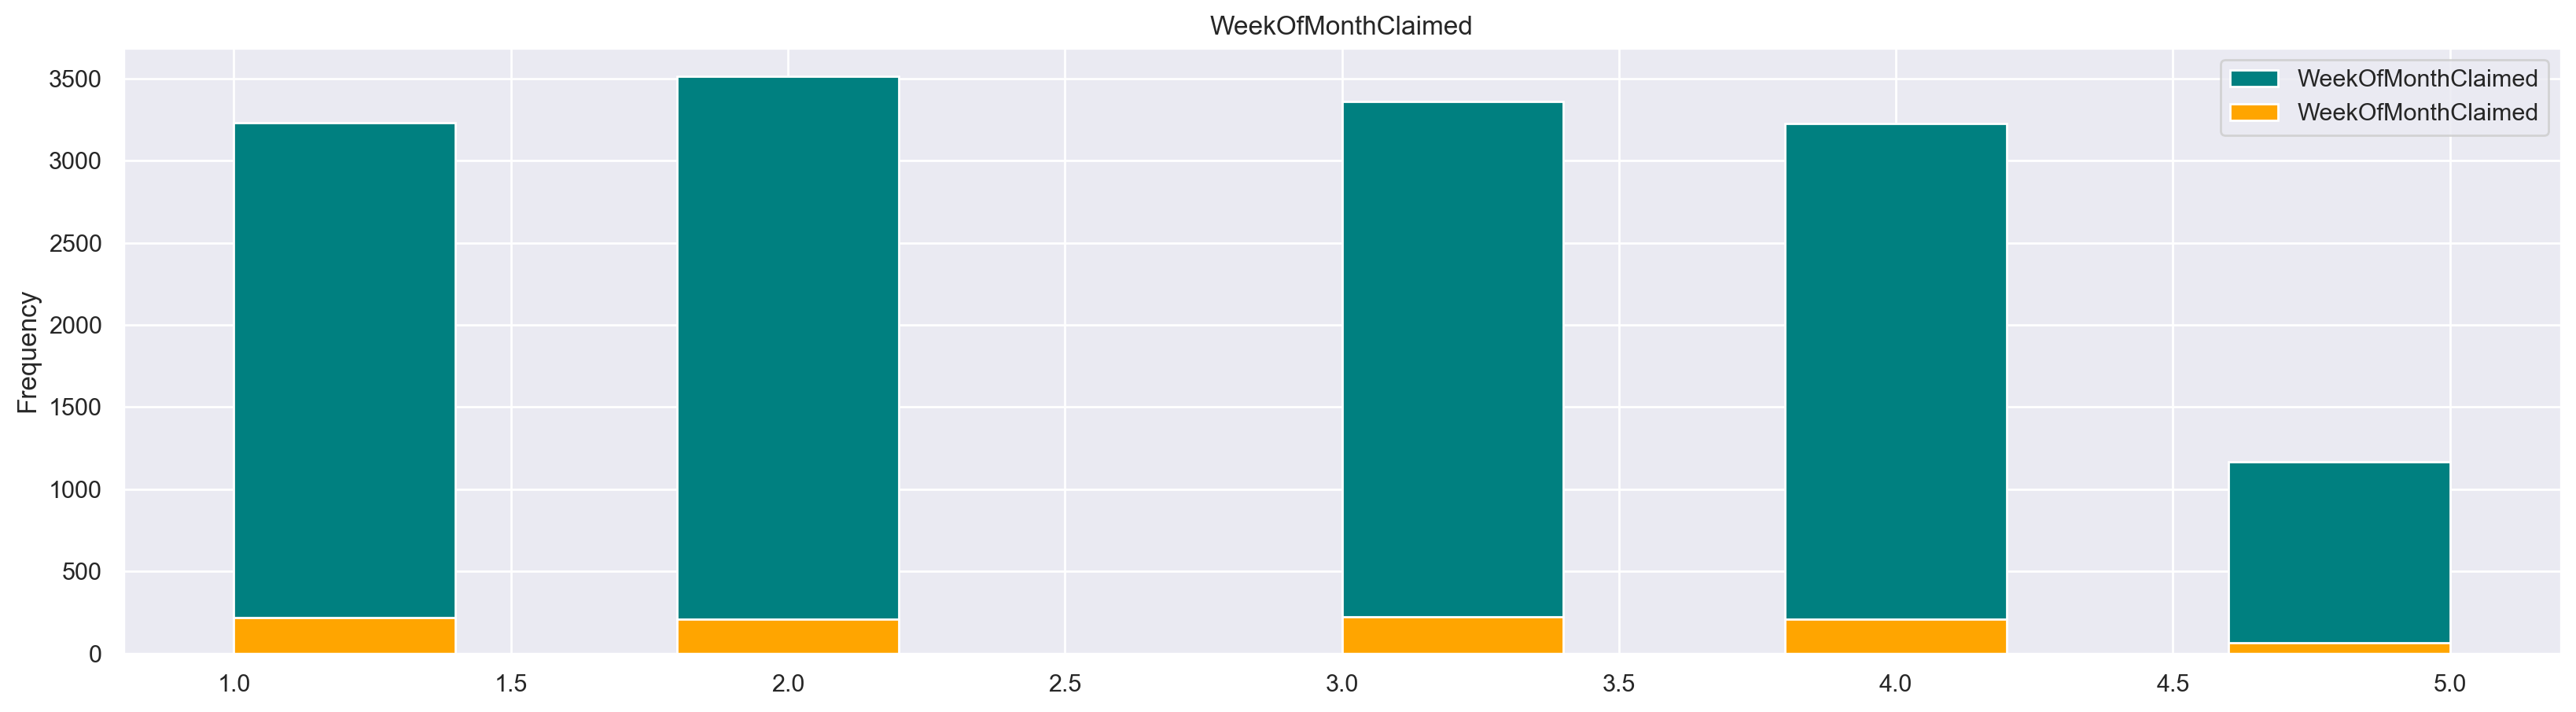

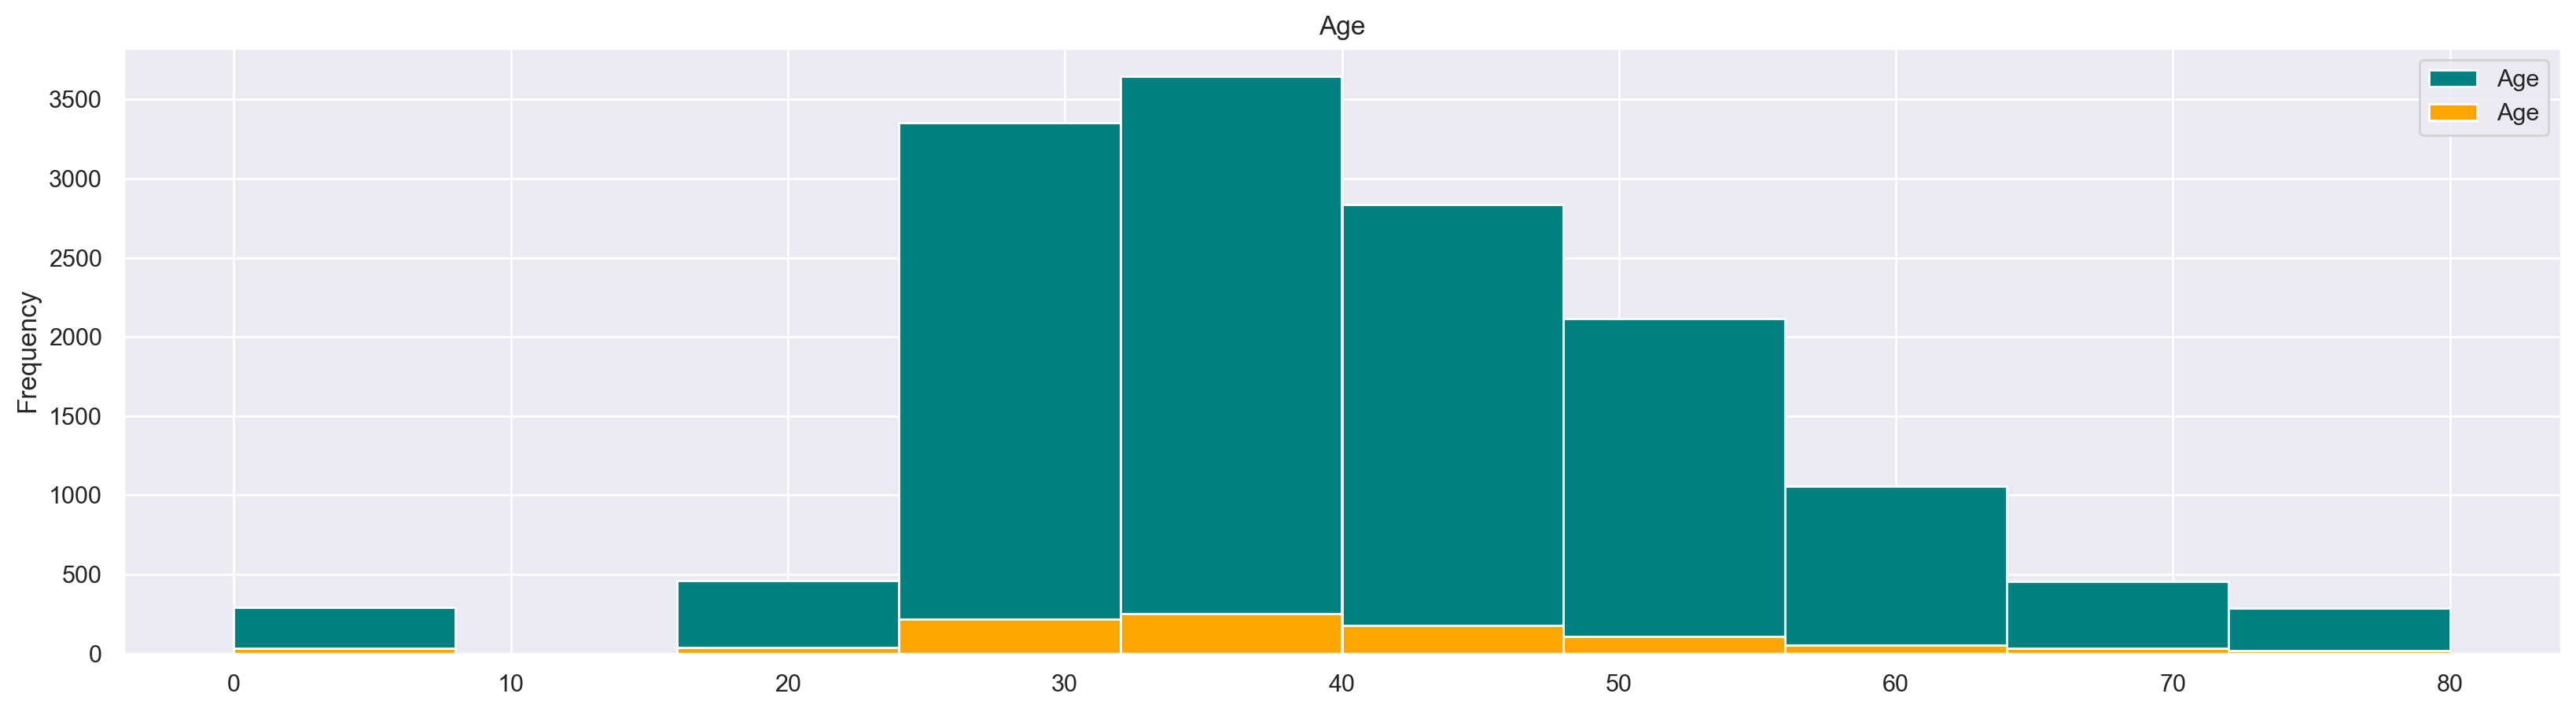

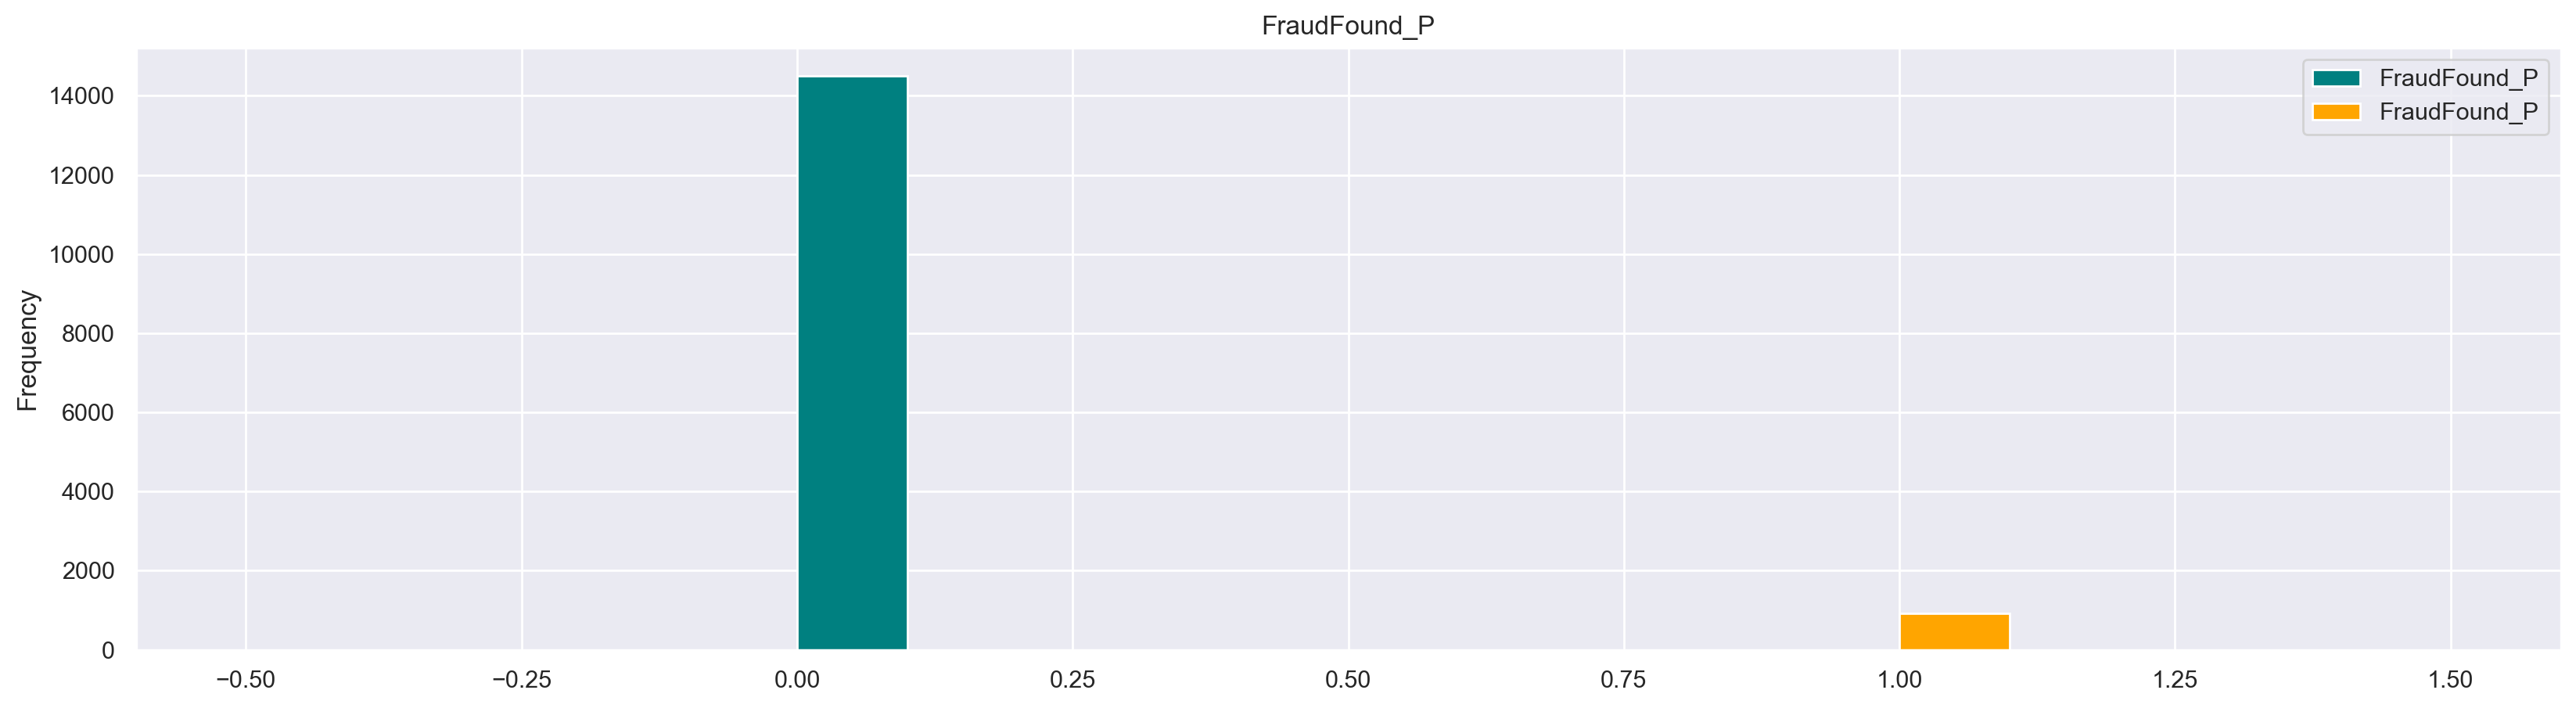

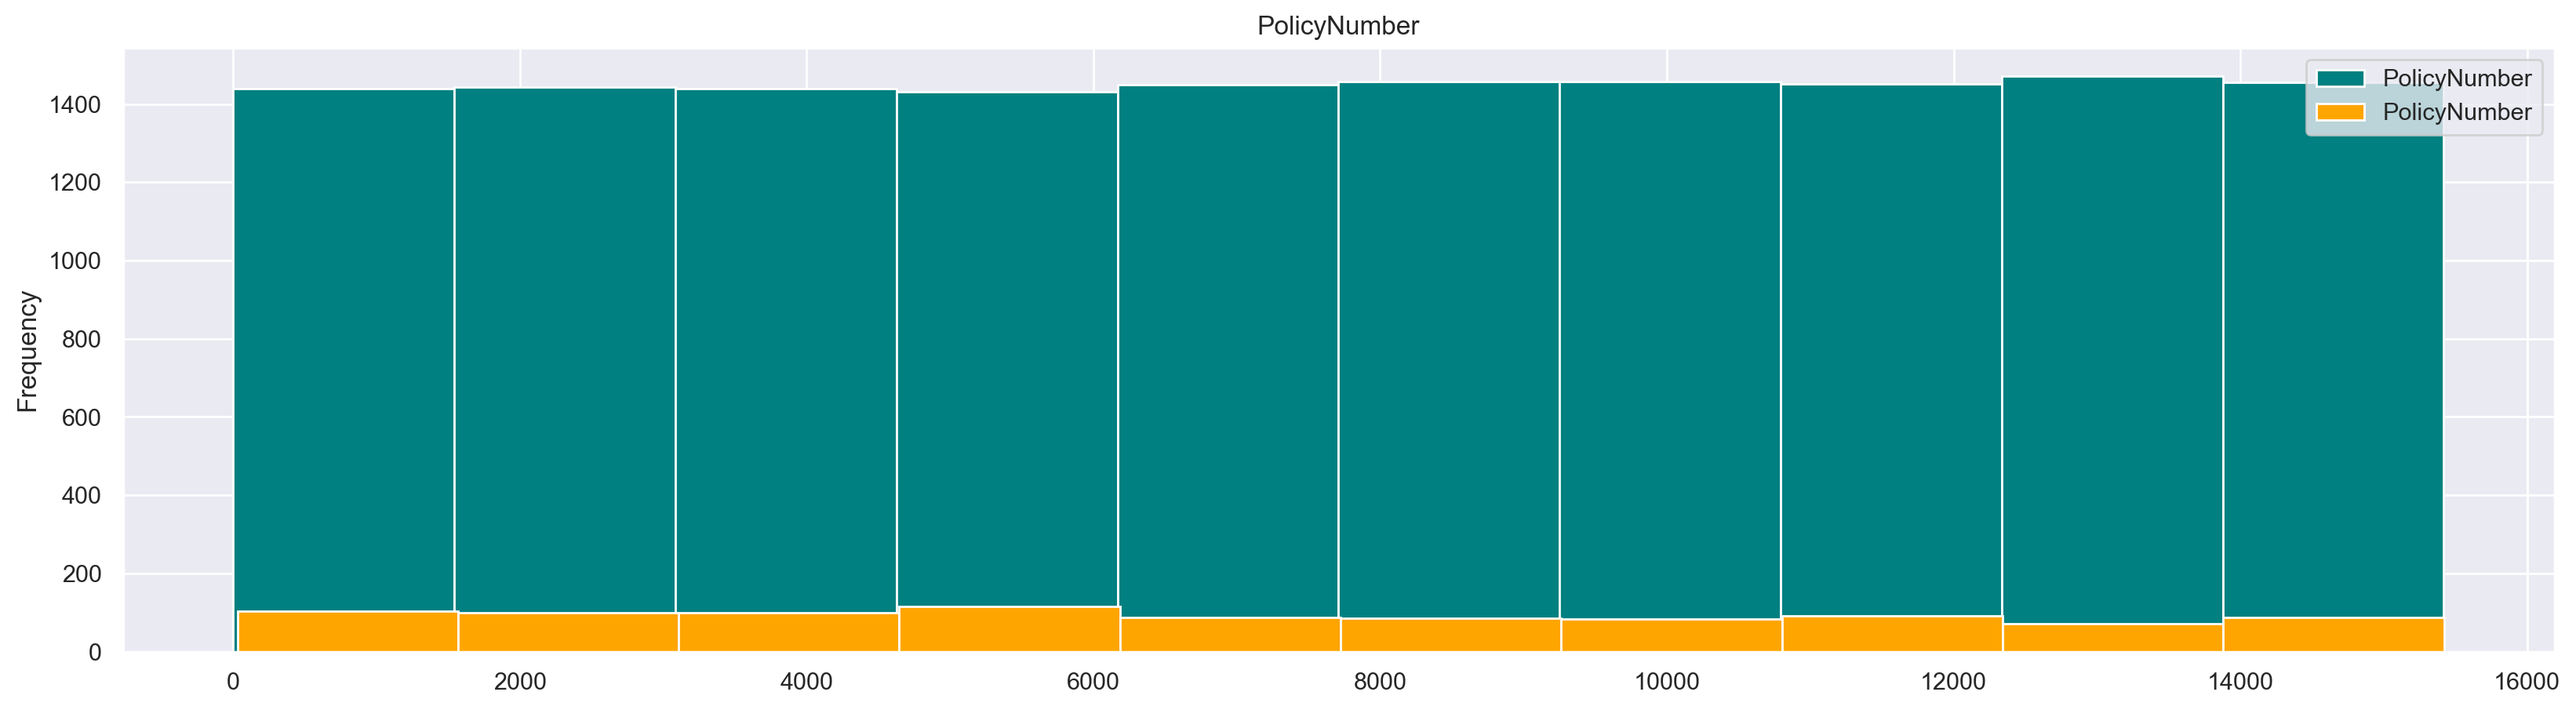

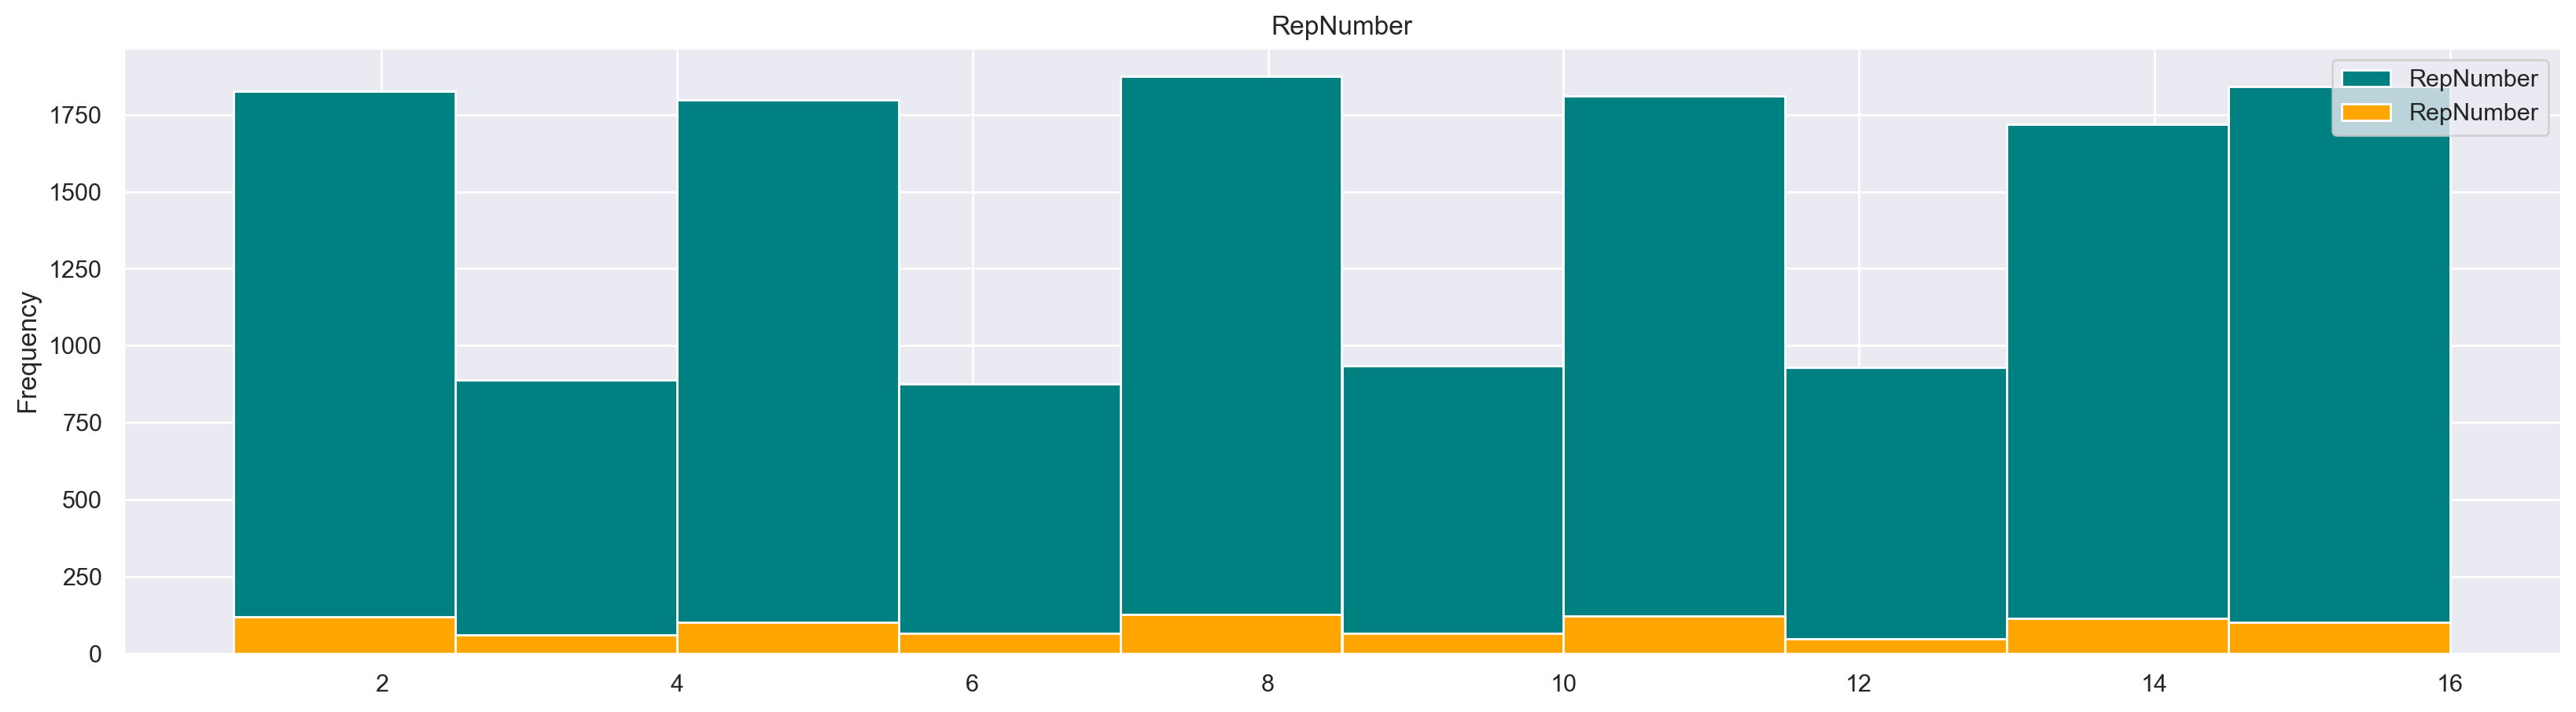

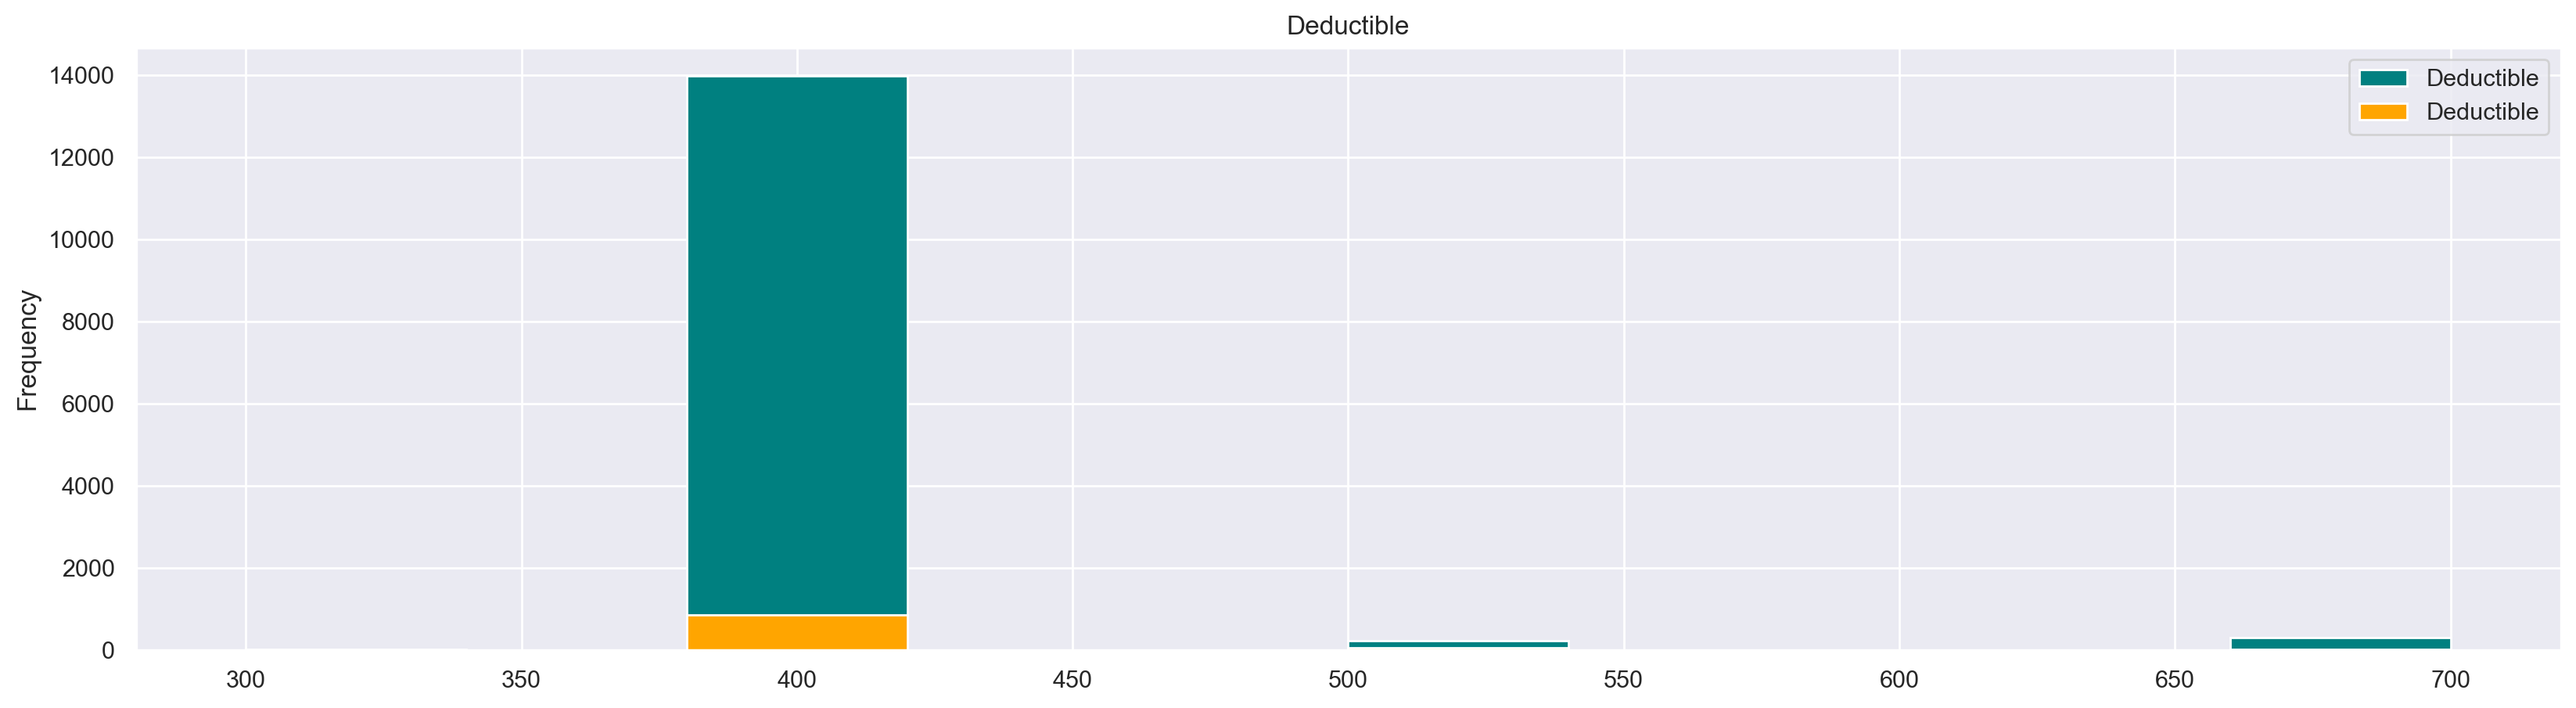

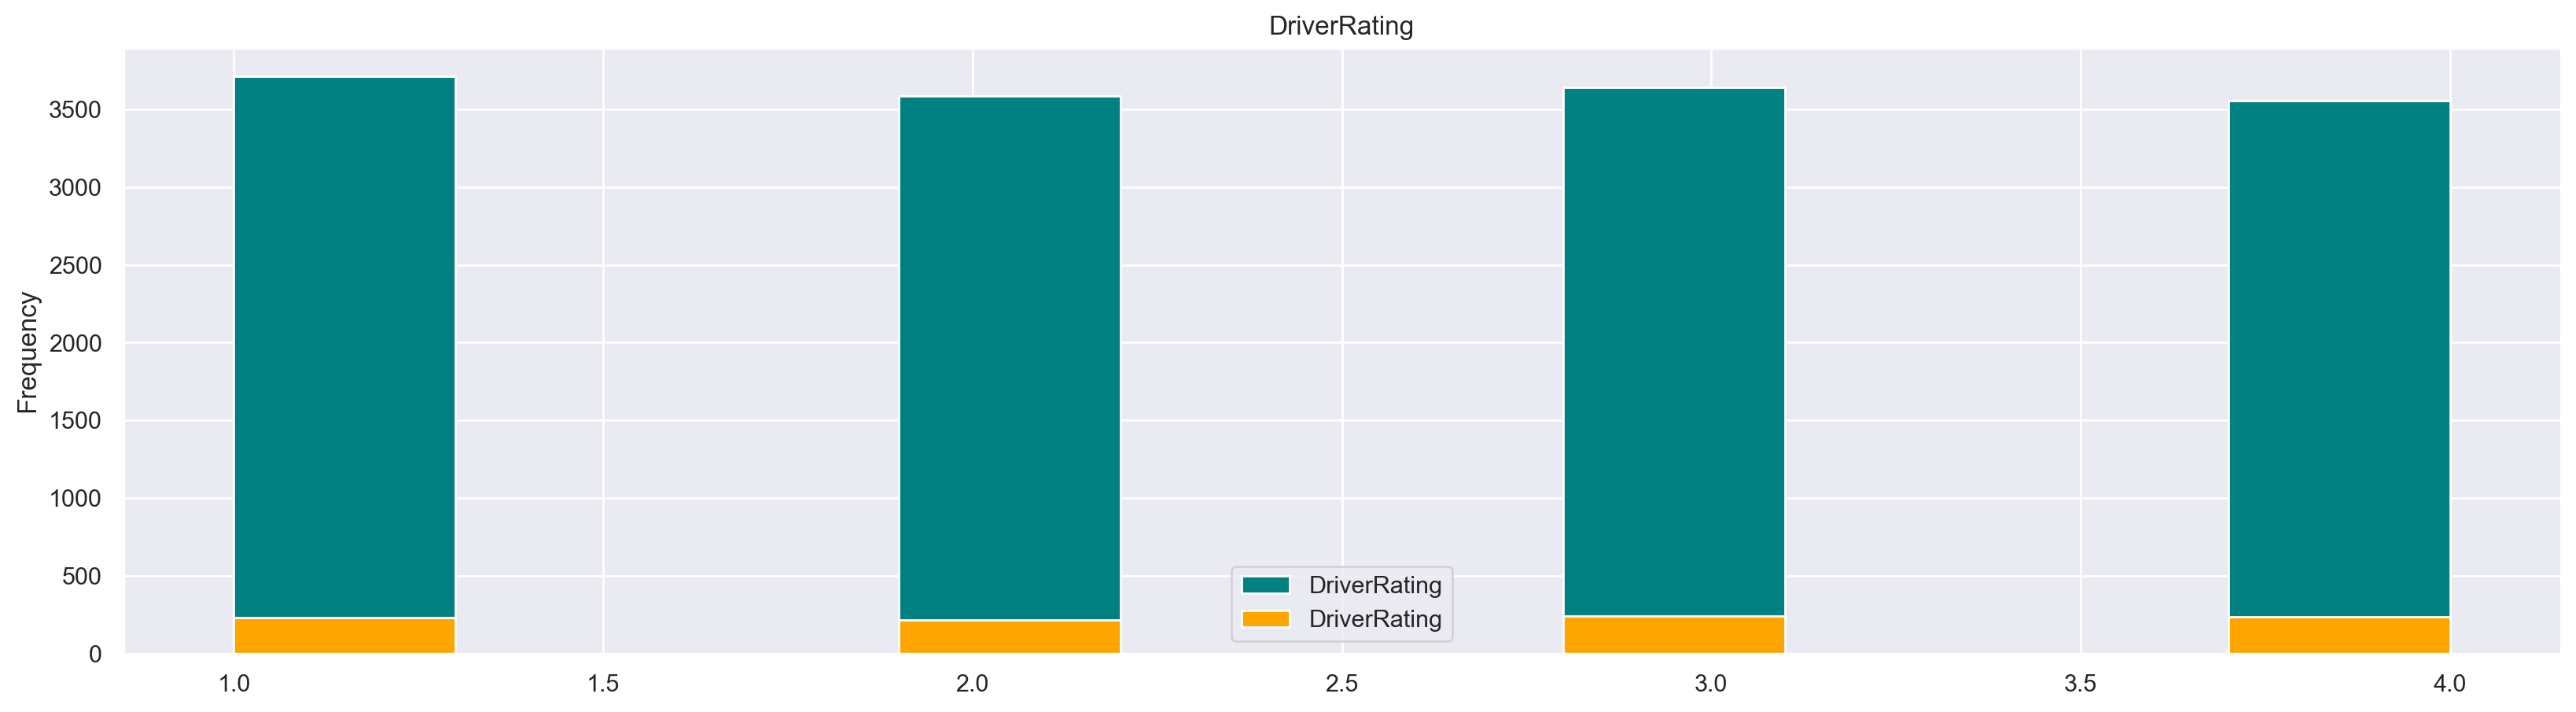

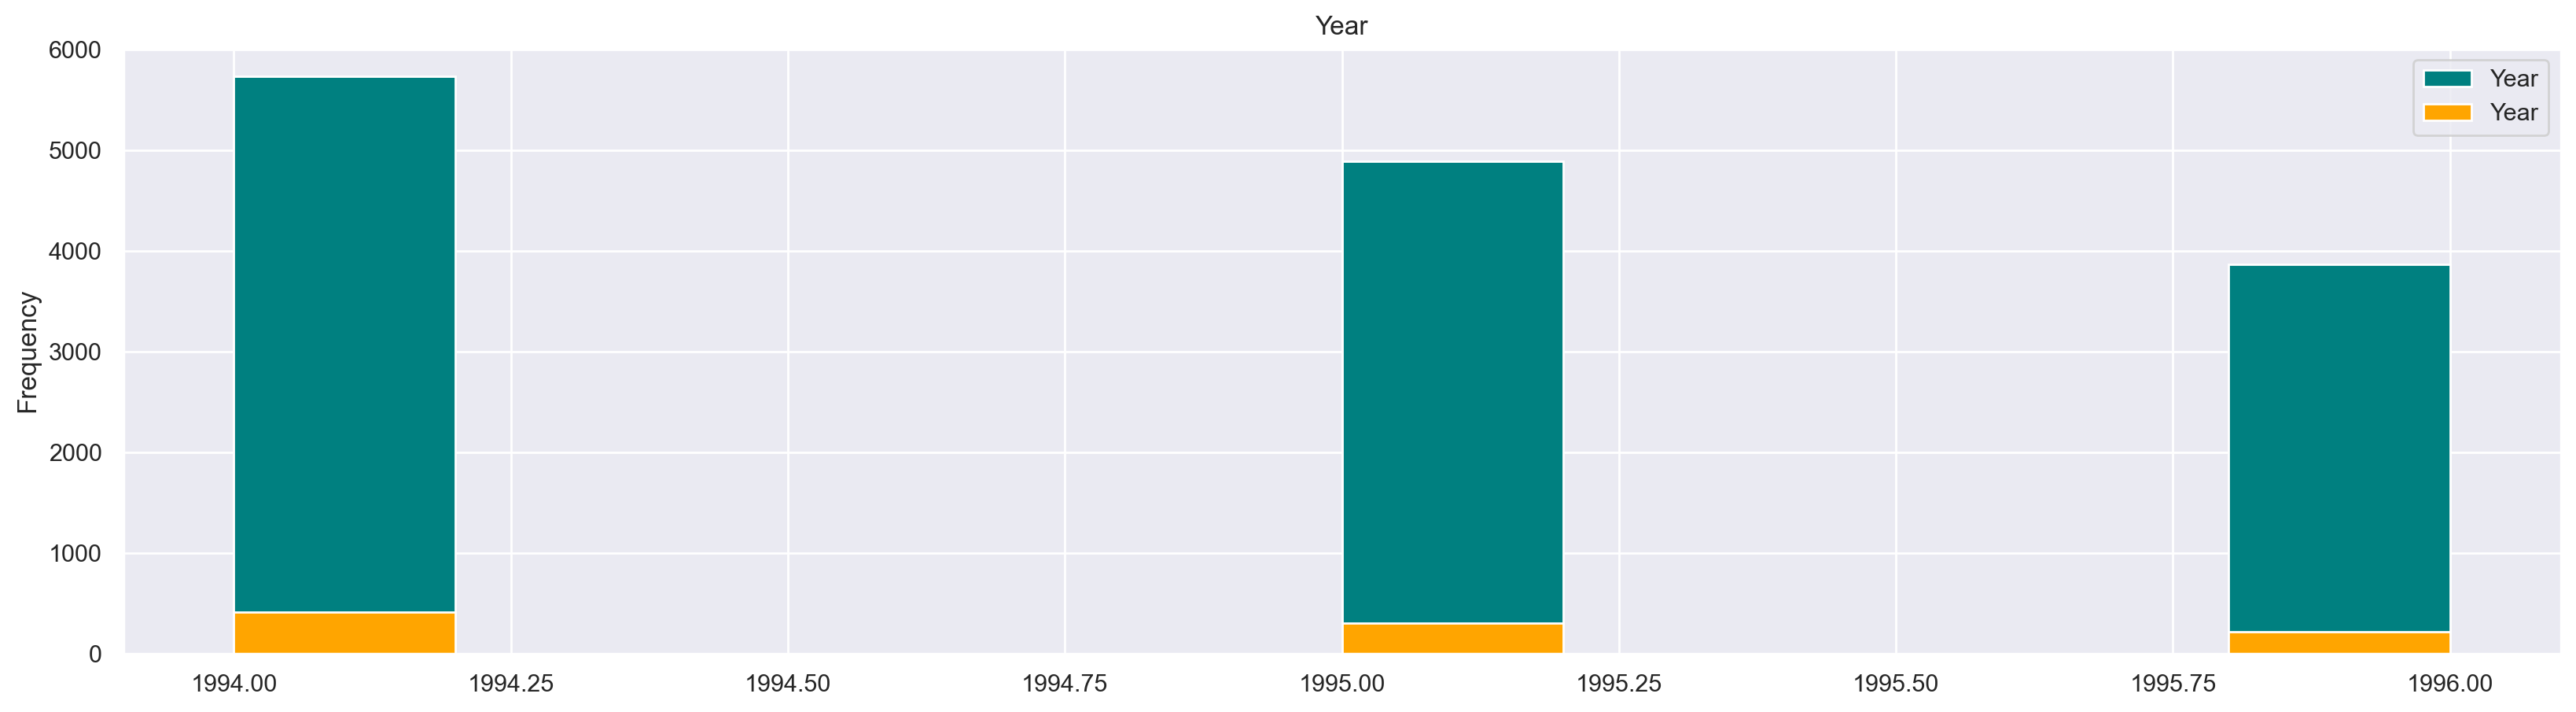

In [186]:
# this code needs the import statments, which were moved to the top
# from pandas.api.types import is_string_dtype
# from pandas.api.types import is_numeric_dtype

# Subset  df to legit and fraud
legit = df_claim['FraudFound_P'] == 0
df_legit = df_claim[legit]

fraud = df_claim['FraudFound_P'] == 1
df_fraud = df_claim[fraud]

#df_legit.plot(kind='hist')


# step 1: Get list of columns
#   Do this inside the for loop

# Step 2: for x in list :

for i in list(df_claim) :
    # print(df_fraud[i])
    if (is_numeric_dtype(df_fraud[i])) :
        df_legit[i].plot(kind='hist', color = 'teal')  # Looping through every item in the df
        df_fraud[i].plot(kind='hist', color = 'orange')
        #ax2 = ax1.twinx()  # The Twinx function is used to ensure we share the x-axis for both plots
        # ax2.plot(df_fraud[i], kind='density' ,color = 'r')
        plt.legend()
        plt.title(i)
        plt.show()


In [32]:
# Analyze Categorical Data
claim_totals = df_claim.groupby(['MaritalStatus', 'Sex'], as_index=False)['FraudFound_P'].sum()
print(claim_totals)
# df_claim.plot(x='MaritalStatus', y='FraudFound_P', kind='scatter')

  MaritalStatus     Sex  FraudFound_P
0      Divorced  Female             1
1      Divorced    Male             2
2       Married  Female            64
3       Married    Male           575
4        Single  Female            38
5        Single    Male           240
6         Widow  Female             2
7         Widow    Male             1


## Inferential Statistical Analysis
### Create a Heatmap

_# DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)_
<br>df_corr = dataframe_raw.corr()

_# sns.heatmap(corr_df, annot=True) - annot - Use annot to represent the cell values with text:_
<br>sns.heatmap(df_corr, annot=True, linewidth=.5)


<AxesSubplot:>

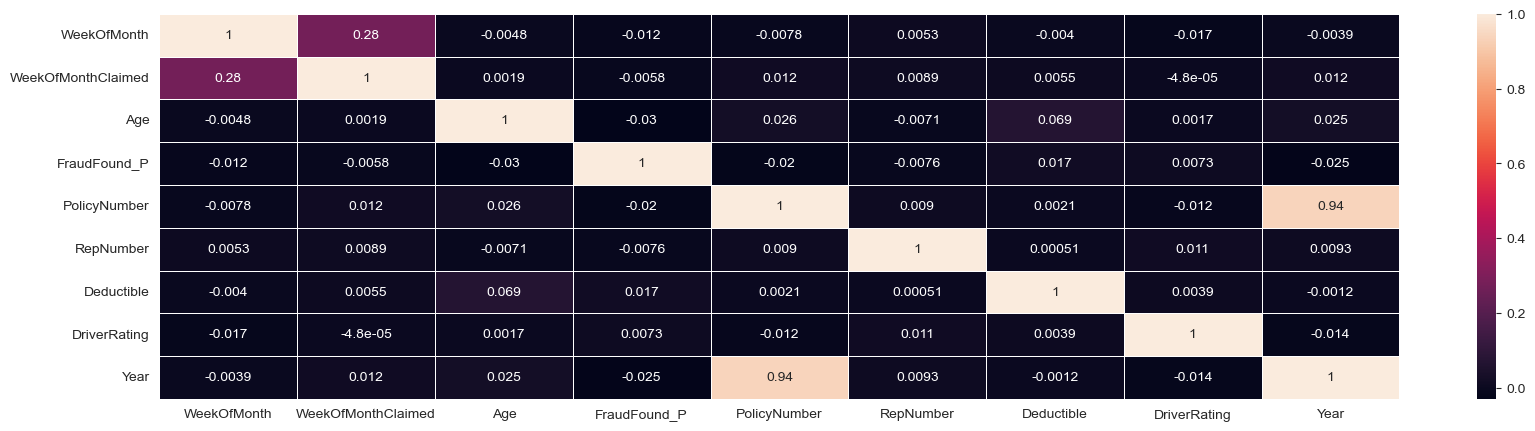

In [34]:
# DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)
df_claim_corr = df_claim.corr()

# sns.heatmap(corr_df, annot=True) - annot - Use annot to represent the cell values with text:
sns.heatmap(df_claim_corr, annot=True, linewidth=.5)

<Div class='aleart alert-block alert-info'>
Why is the <b>Policy Number</b> the only thing that shows a corralation? 
<br>Why only showing nine columns?
</Div>

In [36]:
df_claim_corr

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.025944,-0.007063,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.025944,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


<AxesSubplot:>

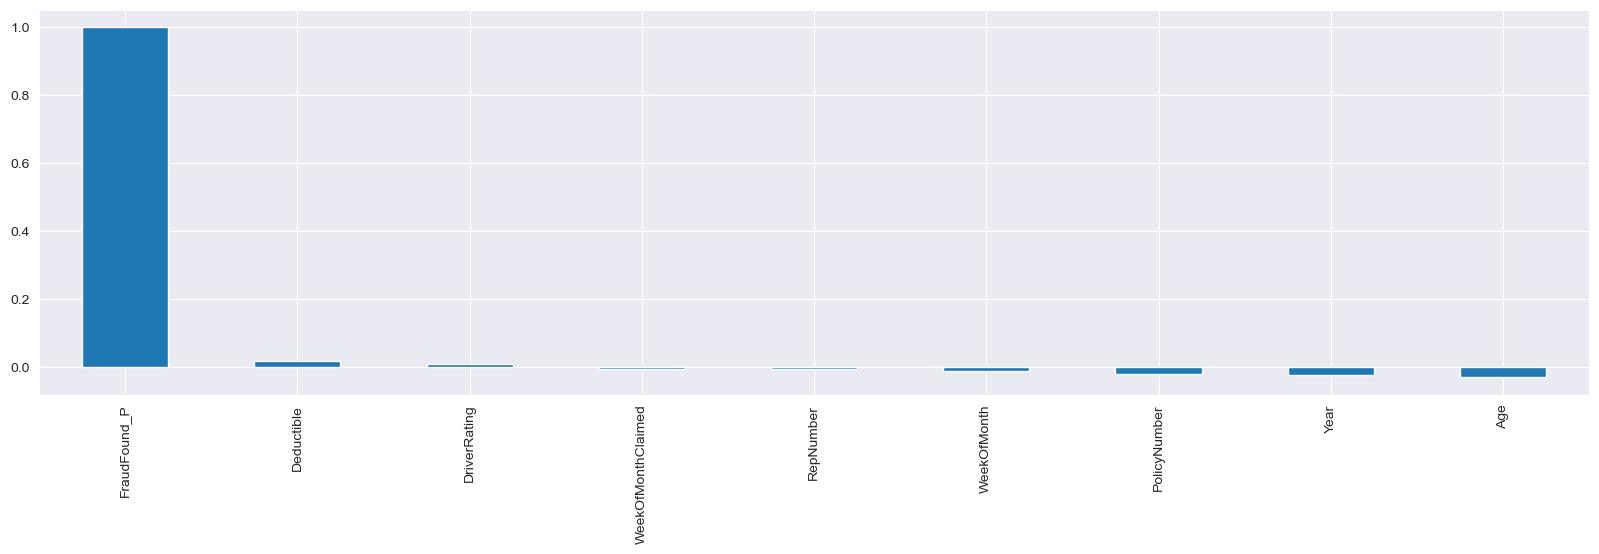

In [37]:
# Sort the col before you plot.
df_claim_corr_srt = df_claim_corr.sort_values('FraudFound_P', ascending=False)

# plot bar chart
df_claim_corr_srt['FraudFound_P'].plot(kind='bar')


In [44]:
#df_claim
# Step 1: df ind_var & df dep_var, wher dep_var = df_claim['FraudFound_P']
#df_ind_var = df_claim
#pcol = ['PUMP FAILURE (1 or 0)']
y = df_claim[['Age','Sex', 'MaritalStatus', 'VehicleCategory',
       'Deductible', 'RepNumber', 'DriverRating']]

x = df_claim[['FraudFound_P']]

# Step 2: df_ind_var = sm.add_constant(df_ind_var)  - account for bias in model
y = sm.add_constant(y)

np.asarray(x)
np.asarray(y)

# Step 3: Store & Fit model
# regression_model = sm.OLS(dependent_variable,independent_variable).fit()
model = sm.OLS(x.astype(float), y.astype(float)).fit()

#print(model.summary())

ValueError: could not convert string to float: 'Female'